# Supply chain data EDA 
## Part1. Get the data
## Part2. Exploratory Data Analysis(EDA) 
### 1)Removing redundant features.
### 2)Adding any few features.
## Part3. Predictive Modeling
### 1)Running Apriori Algorithm

## Part1. Get the data

In [1]:
import warnings
warnings.filterwarnings(action='ignore')

In [14]:
from mlxtend.frequent_patterns import association_rules, apriori
from mlxtend.preprocessing import TransactionEncoder
from sklearn.preprocessing import LabelEncoder
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import platform
import re
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus']= False 

if platform.system() == 'Darwin': 
    plt.style.use('seaborn-darkgrid') 
    rc('font', family = 'AppleGothic') 
    


In [367]:
from glob import glob
files = glob("./dataset/supply_chain/*.xls")

In [4]:
df_list = [] 
for file in files:
    df_raw = pd.read_excel(file, "Table1", 
                      dtype={
                          'No':int,
                          '일자':str,
                          '매출처':str,
                          '코드':str,
                          '품목명': str,
                          '규격': str,
                          '원산지': str,
                          '단위': str,
                          '수량': float,
                          '단가': float,
                          '합계': float,
                          '금액': float,
                          '세액': float,
                          '비고': str                          
                      }
        )
    df_list.append(df_raw)
    
df_raw = pd.concat(df_list)
    

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but 

### How raw data looks like?

In [5]:
print(df_raw[:10])
df_raw.shape

   No        일자      매출처       코드                                       품목명  \
0   1  20211201    가은요양원  1028369                         (직) 데친고사리 1kg(냉장}   
1   2  20211201    가은요양원  1105057                         (직) 깐도라지채 1kg(냉장}   
2   3  20211201    가은요양원  1093670                         콩나물 박스 4kg(상 곱슬이)   
3   4  20211201    가은요양원  1003475                         *삼색수제비 1kg(동성 냉동)   
4   5  20211201    가은요양원  1091376                         *)자숙바지락살 350g(냉동)   
5   6  20211201  공동체협동조합  1142532  *)소앞다리 kg(소전각 2.5cm*2.5*2.5  깍둑 장조림용 냉동)   
6   7  20211201  공동체협동조합  1019900                         *하이라이스분말 1kg(오뚜기)   
7   8  20211201  공동체협동조합  1050052             *혼합버섯 kg(생 애느타리버섯 새송이버섯 표고버섯)   
8   9  20211201  공동체협동조합  1137396       지가이리멸치 500g(자멸치 지리멸치+가이리멸치 볶음용멸치 중)   
9  10  20211201  공동체협동조합  1104786                         볶음아몬드 200g(웰넛 실온)   

                    규격                   원산지   단위   수량       단가       합계  \
0          (냉장)1kg 팩포장                   중국산   Kg  2.0

(872824, 14)

##### 2 years raw data has 14 columns and 872824 rows

## Part2. Exploratory Data Analysis(EDA) 

### 1)Removing redundant features.

In [254]:
df=df_raw.copy()
df = df.drop(df[df["일자"]=="소계"].index)
df = df.drop(df[df["일자"]=="합계"].index)

In [255]:
df[df["일자"]=="합계"]

,No,일자,매출처,코드,품목명,규격,원산지,단위,수량,단가,합계,금액,세액,비고


In [256]:
df[df["일자"]=="소계"]

,No,일자,매출처,코드,품목명,규격,원산지,단위,수량,단가,합계,금액,세액,비고


#### After clean the inner redundant features.

In [257]:
df.head()

,No,일자,매출처,코드,품목명,규격,원산지,단위,수량,단가,합계,금액,세액,비고
0,1,20211201,가은요양원,1028369,(직) 데친고사리 1kg(냉장},(냉장)1kg 팩포장,중국산,Kg,2.0,4030.0,8060.0,8060.0,0.0,NaN
1,2,20211201,가은요양원,1105057,(직) 깐도라지채 1kg(냉장},(냉장)1kg,중국산,팩,2.0,7040.0,14080.0,14080.0,0.0,NaN
2,3,20211201,가은요양원,1093670,콩나물 박스 4kg(상 곱슬이),박스 4kg,"수입대두(중국,미국,캐나다)",Box,1.0,5100.0,5100.0,5100.0,0.0,NaN
3,4,20211201,가은요양원,1003475,*삼색수제비 1kg(동성 냉동),(냉동)1kg,국내,PK,2.0,2750.0,6050.0,5500.0,550.0,NaN
4,5,20211201,가은요양원,1091376,*)자숙바지락살 350g(냉동),(냉동)350g/팩,중국산,팩,5.0,2420.0,13310.0,12100.0,1210.0,NaN


#### Leave valuable data for reasons below.
#### -Figure the customers out for periodicity, frequency, Purchase Inclination mainly. 
#### -Fiture out for product origin inclination, product quantity, product price, purchase aggregation additionally.

In [258]:
df.drop(columns=["No","규격","단위","합계","세액","비고"], inplace=True)
df.head()

,일자,매출처,코드,품목명,원산지,수량,단가,금액
0,20211201,가은요양원,1028369,(직) 데친고사리 1kg(냉장},중국산,2.0,4030.0,8060.0
1,20211201,가은요양원,1105057,(직) 깐도라지채 1kg(냉장},중국산,2.0,7040.0,14080.0
2,20211201,가은요양원,1093670,콩나물 박스 4kg(상 곱슬이),"수입대두(중국,미국,캐나다)",1.0,5100.0,5100.0
3,20211201,가은요양원,1003475,*삼색수제비 1kg(동성 냉동),국내,2.0,2750.0,5500.0
4,20211201,가은요양원,1091376,*)자숙바지락살 350g(냉동),중국산,5.0,2420.0,12100.0


#### After drop useless columns

In [259]:
df.rename(columns={"일자":"day","매출처":"customer","코드":"product","품목명":"product_name","원산지":"origin", "수량":"quantity","단가":"price","금액":"aggregate"}, inplace=True) 
df.head()
print(df.shape)

(858818, 8)


#### Cleaning the product name

In [260]:
prodlist = df["product_name"].unique()
print(len(prodlist))

21058


In [575]:
df["product_name"].value_counts()

(직) 취청오이 kg(생)                     7332
(직) 쥬키니호박 kg(생)                    6220
(직) 흙대파 kg(생 끝 절단안함)               6103
*손맛판두부 3kg(부침용 해두른 냉장)**           6058
(직) 부추 kg(생 조선부추)                  5065
                                   ... 
멸균딸기우유 200ml(매일)                      1
고운청양고춧가루 1kg(24메쉬 진미농산)               1
고무장화 29.5cm WHITE 270mm(보생항균장화)       1
꼬들단무지 1kg(압축 슬라이스 실온)                 1
니트릴장갑 ea(파랑색_중 100개 CJ 이츠웰)           1
Name: product_name, Length: 21058, dtype: int64

In [261]:
prodlist = [ re.sub("([0-9]+)?(k)?g", "", s).strip() for s in prodlist ]
prodlist[0:10]

['(직) 데친고사리 (냉장}',
 '(직) 깐도라지채 (냉장}',
 '콩나물 박스 (상 곱슬이)',
 '*삼색수제비 (동성 냉동)',
 '*)자숙바지락살 (냉동)',
 '*)소앞다리 (소전각 2.5cm*2.5*2.5  깍둑 장조림용 냉동)',
 '*하이라이스분말 (오뚜기)',
 '*혼합버섯 (생 애느타리버섯 새송이버섯 표고버섯)',
 '지가이리멸치 (자멸치 지리멸치+가이리멸치 볶음용멸치 중)',
 '볶음아몬드 (웰넛 실온)']

In [380]:
ptn1 = re.compile('[^ ㄱ-ㅎㅏ-ㅣ가-힣\(\)\{\}\[\]]')
ptn2 = re.compile(' +')
ptn3 = re.compile("[\(\{\[].*[\)\}\]]")
ptn4 = re.compile(' +박스| +한판| +마리| +개| +망| +단위발주량| +단위발주| +봉| +추천| +내외| +통| +과일| +직| +공급중| +월요| +입고불가| +매| +할| +ea|[km]?[gl]| +완제품|할+ ')

def processing(text):
    result = ptn1.sub("", text)
    result = ptn2.sub(' ', result)
    result = ptn3.sub("", result)
    result = ptn4.sub("", result)
    return result.strip()


from tqdm.notebook import tqdm

result = [processing(t) for t in tqdm(prodlist)]
# result[-100:]
len(result)

  0%|          | 0/21058 [00:00<?, ?it/s]

21058

In [326]:
# Drop the duplicate of product_name
df_drop=df.drop_duplicates(subset=['product_name'])
df_drop.shape

(21058, 8)

In [574]:
df_drop.head()

,day,customer,product,product_name,origin,quantity,price,aggregate,product_short_name,month,ym
0,2021-12-01,가은요양원,1028369,(직) 데친고사리 1kg(냉장},중국산,2.0,4030.0,8060.0,데친고사리,12,202112
1,2021-12-01,가은요양원,1105057,(직) 깐도라지채 1kg(냉장},중국산,2.0,7040.0,14080.0,깐도라지채,12,202112
2,2021-12-01,가은요양원,1093670,콩나물 박스 4kg(상 곱슬이),"수입대두(중국,미국,캐나다)",1.0,5100.0,5100.0,콩나물,12,202112
3,2021-12-01,가은요양원,1003475,*삼색수제비 1kg(동성 냉동),국내,2.0,2750.0,5500.0,삼색수제비,12,202112
4,2021-12-01,가은요양원,1091376,*)자숙바지락살 350g(냉동),중국산,5.0,2420.0,12100.0,자숙바지락살,12,202112


In [327]:
# Match refined product name with the data which is dropped the duplicate of product_name

df_drop['product_short_name']=prodlist
df_drop.shape

(21058, 9)

In [381]:
df_drop['product_short_name']=result
df_drop.shape

(21058, 9)

In [382]:
# df_drop.drop(columns=['product_short_name'],inplace=True)
# df_drop.rename(columns={'product_short_name1':'product_short_name'},inplace=True)
df_drop.head()

,day,customer,product,product_name,origin,quantity,price,aggregate,product_short_name
0,20211201,가은요양원,1028369,(직) 데친고사리 1kg(냉장},중국산,2.0,4030.0,8060.0,데친고사리
1,20211201,가은요양원,1105057,(직) 깐도라지채 1kg(냉장},중국산,2.0,7040.0,14080.0,깐도라지채
2,20211201,가은요양원,1093670,콩나물 박스 4kg(상 곱슬이),"수입대두(중국,미국,캐나다)",1.0,5100.0,5100.0,콩나물
3,20211201,가은요양원,1003475,*삼색수제비 1kg(동성 냉동),국내,2.0,2750.0,5500.0,삼색수제비
4,20211201,가은요양원,1091376,*)자숙바지락살 350g(냉동),중국산,5.0,2420.0,12100.0,자숙바지락살


In [383]:
df_drop['product_short_name'][100:150]

107            백물엿
108    순창궁 태양초 고추장
109           다진마늘
110       맛미진백후추가루
111            흰설탕
113         데리야끼소스
114          청색수세미
115            면장갑
117           건다시마
118           닭도리육
119           지리멸치
120           꽈리고추
121          파우치참치
125             곤약
126          얼갈이배추
127             가지
128            시금치
129           돈뒷다리
130            콩나물
131           마카로니
133            게맛살
134         빨강파프리카
136          양지뜰된장
137         미숙포기김치
138             감자
139           키친타올
140            백물엿
141            바나나
142          고구마전분
144           진콩두유
145             미향
146           냉동아욱
147           깐양배추
149             아욱
151           돈삼겹살
152          미돈앞다리
153        아몬드슬라이스
154          고등어토막
155        데친무청시래기
156           돈뒷다리
157          양념깻잎지
158             감자
159          냉동청피망
160          검은콩자반
161          검은콩자반
162            물만두
163             계란
164           돈뒷다리
165        냉동혼합야채종
166             감자
Name: product_short_name, dtype: object

In [428]:
# Counting product_short_name 

df_drop['product_short_name'].value_counts()

돈뒷다리          173
돈앞다리           97
떠먹는요거트         83
고무장갑           82
소앞다리           76
             ... 
조리복하의           1
투명한김치만두         1
검은콩칼슘두유         1
냉동모짜렐라슬라이스      1
치킨전용믹스          1
Name: product_short_name, Length: 7260, dtype: int64

In [430]:
df_drop["day"] = pd.to_datetime(df_drop["day"])
df_drop.head()

,day,customer,product,product_name,origin,quantity,price,aggregate,product_short_name
0,2021-12-01,가은요양원,1028369,(직) 데친고사리 1kg(냉장},중국산,2.0,4030.0,8060.0,데친고사리
1,2021-12-01,가은요양원,1105057,(직) 깐도라지채 1kg(냉장},중국산,2.0,7040.0,14080.0,깐도라지채
2,2021-12-01,가은요양원,1093670,콩나물 박스 4kg(상 곱슬이),"수입대두(중국,미국,캐나다)",1.0,5100.0,5100.0,콩나물
3,2021-12-01,가은요양원,1003475,*삼색수제비 1kg(동성 냉동),국내,2.0,2750.0,5500.0,삼색수제비
4,2021-12-01,가은요양원,1091376,*)자숙바지락살 350g(냉동),중국산,5.0,2420.0,12100.0,자숙바지락살


In [431]:
df_drop['month']=df_drop['day'].dt.strftime("%m")    
df_drop.head()

,day,customer,product,product_name,origin,quantity,price,aggregate,product_short_name,month
0,2021-12-01,가은요양원,1028369,(직) 데친고사리 1kg(냉장},중국산,2.0,4030.0,8060.0,데친고사리,12
1,2021-12-01,가은요양원,1105057,(직) 깐도라지채 1kg(냉장},중국산,2.0,7040.0,14080.0,깐도라지채,12
2,2021-12-01,가은요양원,1093670,콩나물 박스 4kg(상 곱슬이),"수입대두(중국,미국,캐나다)",1.0,5100.0,5100.0,콩나물,12
3,2021-12-01,가은요양원,1003475,*삼색수제비 1kg(동성 냉동),국내,2.0,2750.0,5500.0,삼색수제비,12
4,2021-12-01,가은요양원,1091376,*)자숙바지락살 350g(냉동),중국산,5.0,2420.0,12100.0,자숙바지락살,12


In [432]:
df_drop["ym"] = df_drop["day"].apply(lambda row : row.strftime("%Y%m"))
df_drop.head()

,day,customer,product,product_name,origin,quantity,price,aggregate,product_short_name,month,ym
0,2021-12-01,가은요양원,1028369,(직) 데친고사리 1kg(냉장},중국산,2.0,4030.0,8060.0,데친고사리,12,202112
1,2021-12-01,가은요양원,1105057,(직) 깐도라지채 1kg(냉장},중국산,2.0,7040.0,14080.0,깐도라지채,12,202112
2,2021-12-01,가은요양원,1093670,콩나물 박스 4kg(상 곱슬이),"수입대두(중국,미국,캐나다)",1.0,5100.0,5100.0,콩나물,12,202112
3,2021-12-01,가은요양원,1003475,*삼색수제비 1kg(동성 냉동),국내,2.0,2750.0,5500.0,삼색수제비,12,202112
4,2021-12-01,가은요양원,1091376,*)자숙바지락살 350g(냉동),중국산,5.0,2420.0,12100.0,자숙바지락살,12,202112


In [544]:
cus_prod_allmonths=df_drop[['customer','product_short_name']]
cus_prod_allmonths.head()

,customer,product_short_name
0,가은요양원,데친고사리
1,가은요양원,깐도라지채
2,가은요양원,콩나물
3,가은요양원,삼색수제비
4,가은요양원,자숙바지락살


In [545]:
onehot_allmonths = cus_prod_allmonths.pivot_table(index='customer', columns='product_short_name', aggfunc=len, fill_value=0)
onehot_allmonths = onehot_allmonths>0
onehot_allmonths[:100]

product_short_name,ㄷ자형 핫도그받침,가나초코바아몬드,가나초코우유,가나초콜릿,가득찬교자만두,가득찬깐쇼새우,가득찬물만두,가락우동건더기스프,가락우동국물,가락우동면,...,흰색백만송이버섯,흰설탕,흰송편,흰앙금절편,흰우유,흰콩자반,히커리스모크바베큐소스,히터,힘내파인애플씨,힘찬하루헛개차
customer,,,,,,,,,,,,,,,,,,,,,
A-푸드마스터★,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
A-푸드마스터★[농산],False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
ABC[배송팀],False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
ABC[본사사무실],False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
ABC[지원-등록],False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
구세군군산후생원[소모품],False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
구이노인복지센터,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
국립식량과학원**,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [570]:
frequent_itemsets_allmonths = apriori(onehot_allmonths[:100], min_support = 0.05, max_len = 2, use_colnames=True)

# compute all association rules for frequent_itemsets
rules_allmonths = association_rules(frequent_itemsets_allmonths)
rules_allmonths[:100]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(갈치토막),(소앞다리),0.06,0.10,0.05,0.833333,8.333333,0.0440,5.40
1,(양배추),(감자),0.07,0.17,0.06,0.857143,5.042017,0.0481,5.81
2,(조미김가루),(닭다리살),0.05,0.12,0.05,1.000000,8.333333,0.0440,inf


In [629]:
# Latest 12months
df["day"] = pd.to_datetime(df["day"])
df.head()

,day,customer,product,product_name,origin,quantity,price,aggregate
0,2021-12-01,가은요양원,1028369,(직) 데친고사리 1kg(냉장},중국산,2.0,4030.0,8060.0
1,2021-12-01,가은요양원,1105057,(직) 깐도라지채 1kg(냉장},중국산,2.0,7040.0,14080.0
2,2021-12-01,가은요양원,1093670,콩나물 박스 4kg(상 곱슬이),"수입대두(중국,미국,캐나다)",1.0,5100.0,5100.0
3,2021-12-01,가은요양원,1003475,*삼색수제비 1kg(동성 냉동),국내,2.0,2750.0,5500.0
4,2021-12-01,가은요양원,1091376,*)자숙바지락살 350g(냉동),중국산,5.0,2420.0,12100.0


In [630]:
df["ym"] = df["day"].apply(lambda row : row.strftime("%Y%m"))
df.head()

,day,customer,product,product_name,origin,quantity,price,aggregate,ym
0,2021-12-01,가은요양원,1028369,(직) 데친고사리 1kg(냉장},중국산,2.0,4030.0,8060.0,202112
1,2021-12-01,가은요양원,1105057,(직) 깐도라지채 1kg(냉장},중국산,2.0,7040.0,14080.0,202112
2,2021-12-01,가은요양원,1093670,콩나물 박스 4kg(상 곱슬이),"수입대두(중국,미국,캐나다)",1.0,5100.0,5100.0,202112
3,2021-12-01,가은요양원,1003475,*삼색수제비 1kg(동성 냉동),국내,2.0,2750.0,5500.0,202112
4,2021-12-01,가은요양원,1091376,*)자숙바지락살 350g(냉동),중국산,5.0,2420.0,12100.0,202112


In [631]:
df_12months=df[df["ym"] > "202012"]
print(df_12months.head(7))
print(len(df_12months))

         day customer  product                              product_name  \
0 2021-12-01    가은요양원  1028369                         (직) 데친고사리 1kg(냉장}   
1 2021-12-01    가은요양원  1105057                         (직) 깐도라지채 1kg(냉장}   
2 2021-12-01    가은요양원  1093670                         콩나물 박스 4kg(상 곱슬이)   
3 2021-12-01    가은요양원  1003475                         *삼색수제비 1kg(동성 냉동)   
4 2021-12-01    가은요양원  1091376                         *)자숙바지락살 350g(냉동)   
5 2021-12-01  공동체협동조합  1142532  *)소앞다리 kg(소전각 2.5cm*2.5*2.5  깍둑 장조림용 냉동)   
6 2021-12-01  공동체협동조합  1019900                         *하이라이스분말 1kg(오뚜기)   

                 origin  quantity    price  aggregate      ym  
0                   중국산       2.0   4030.0     8060.0  202112  
1                   중국산       2.0   7040.0    14080.0  202112  
2       수입대두(중국,미국,캐나다)       1.0   5100.0     5100.0  202112  
3                    국내       2.0   2750.0     5500.0  202112  
4                   중국산       5.0   2420.0    12100.0  202112  
5      

In [632]:
# df_12months.sort_values(by=['ym'])
df_12months.sort_values(by='ym', ascending=True)

,day,customer,product,product_name,origin,quantity,price,aggregate,ym
13127,2021-01-12,효사랑전주병원,1041546,(NH) 자숙바지락살 1kg(냉동),중국산,1.0,6100.0,6100.0,202101
23793,2021-01-21,박천수정형외과의원,1028336,(직) 팽이버섯 kg(생),국내산,1.0,2840.0,2840.0,202101
23792,2021-01-21,박천수정형외과의원,1098172,*깐양상추 kg(생),국내산,1.5,3620.0,5430.0,202101
23791,2021-01-21,박천수정형외과의원,1046340,*콩나물 박스 4kg(상 곱슬이)**..,"수입대두(중국,미국,캐나다)",1.0,3870.0,3870.0,202101
23790,2021-01-21,박천수정형외과의원,1039039,*손맛판두부 3kg(부침용 해두른 냉장)**,대두:외국산,2.0,4140.0,8280.0,202101
...,...,...,...,...,...,...,...,...,...
32534,2021-12-22,김제노인복지센터,1028313,(직) 참나물 박스 4kg(생),국내산,1.0,20740.0,20740.0,202112
32533,2021-12-22,김제노인복지센터,1141886,(직) 일반새송이버섯 박스 2kg(생 실속형),국내산,2.0,10300.0,20600.0,202112
32532,2021-12-22,김제노인복지센터,1042574,*NH) 고등어토막 kg(특 소제 구이용 70~80g 노르웨이산 지느러미제거),노르웨이산,4.0,8520.0,34080.0,202112
32541,2021-12-22,김제노인복지센터,1049415,*)일품당면 1kg(에스비 쉐프초이스 실온),중국산,2.0,4060.0,8120.0,202112


In [633]:
df_12months[df_12months["product"]=="1001040"]

,day,customer,product,product_name,origin,quantity,price,aggregate,ym
2611,2021-12-02,누리푸드[전주환경청],1001040,*C소앞다리 kg(소전각 소민찌 냉동)**,호주,1.0,12730.0,12730.0,202112
3526,2021-12-02,효_가족요양[본관],1001040,*C소앞다리 kg(소전각 소민찌 냉동)**,호주,2.0,11700.0,23400.0,202112
4904,2021-12-03,익산수사랑병원,1001040,*C소앞다리 kg(소전각 소민찌 냉동)**,호주,2.0,13970.0,27940.0,202112
4962,2021-12-03,전라북도노인복지관,1001040,*C소앞다리 kg(소전각 소민찌 냉동)**,호주,4.0,12730.0,50920.0,202112
5107,2021-12-03,전주행복한요양병원,1001040,*C소앞다리 kg(소전각 소민찌 냉동)**,호주,3.0,13250.0,39750.0,202112
...,...,...,...,...,...,...,...,...,...
31734,2021-03-26,전주행복한요양병원,1001040,*C소앞다리 kg(소전각 소민찌 냉동)**,호주,3.0,12840.0,38520.0,202103
32006,2021-03-26,효_가족요양[본관],1001040,*C소앞다리 kg(소전각 소민찌 냉동)**,호주,3.0,11330.0,33990.0,202103
32727,2021-03-27,전주행복한요양병원,1001040,*C소앞다리 kg(소전각 소민찌 냉동)**,호주,1.0,12840.0,12840.0,202103
32743,2021-03-27,전주행복한요양병원,1001040,*C소앞다리 kg(소전각 소민찌 냉동)**,호주,2.0,12840.0,25680.0,202103


In [654]:
df_12months_pivot = df_12months.pivot_table(
    index="product", 
    columns=["ym"], 
    values="quantity", 
    fill_value=0,
    aggfunc=np.sum)
df_12months_pivot.head()

ym,202101,202102,202103,202104,202105,202106,202107,202108,202109,202110,202111,202112
product,,,,,,,,,,,,
1000025,5.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1000026,0.0,0.0,1.0,3.0,11.0,9.0,6.0,19.0,15.0,13.0,9.0,4.0
1000028,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1000043,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,4.0
1000052,6.0,3.0,9.0,7.0,6.0,9.0,6.0,10.0,3.0,0.0,0.0,0.0


In [655]:
"1000025" in df_12months_pivot.index 

True

In [636]:
df_12months_pivot.columns

Index(['202101', '202102', '202103', '202104', '202105', '202106', '202107',
       '202108', '202109', '202110', '202111', '202112'],
      dtype='object', name='ym')

In [637]:
df_12months_pivot.index

Index(['1000025', '1000026', '1000028', '1000043', '1000052', '1000058',
       '1000074', '1000078', '1000096', '1000097',
       ...
       '1160370', '1160371', '1160372', '1160373', '1160374', '1160377',
       '1160378', '1160381', '1160382', '1164567'],
      dtype='object', name='product', length=18367)

In [588]:
def calc_event_density(datasets: list):
    bin_dataset = [1 if element > 0 else 0 for element in datasets ]
    return np.mean(bin_dataset)-np.var(bin_dataset)

In [656]:
df_12months_pivot.shape

(18367, 12)

In [659]:
df_12months_pivot["density"] = df_12months_pivot.apply(lambda row: calc_event_density(row), axis=1)

In [660]:
df_12months_pivot.head()

ym,202101,202102,202103,202104,202105,202106,202107,202108,202109,202110,202111,202112,density
product,,,,,,,,,,,,,
1000025,5.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.027778
1000026,0.0,0.0,1.0,3.0,11.0,9.0,6.0,19.0,15.0,13.0,9.0,4.0,0.694444
1000028,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.006944
1000043,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,4.0,0.111111
1000052,6.0,3.0,9.0,7.0,6.0,9.0,6.0,10.0,3.0,0.0,0.0,0.0,0.562500


In [643]:
df_12months_pivot["density"].describe()

count    18367.000000
mean         0.210495
std          0.305448
min          0.000000
25%          0.006944
50%          0.062500
75%          0.250000
max          1.000000
Name: density, dtype: float64

In [666]:
print(calc_event_density(df_12months_pivot.iloc[0]))

0.05325443786982251


In [665]:
df_12months_pivot.iloc[0]

ym
202101     5.000000
202102     0.000000
202103     0.000000
202104     5.000000
202105     0.000000
202106     0.000000
202107     0.000000
202108     0.000000
202109     0.000000
202110     0.000000
202111     0.000000
202112     0.000000
density    0.027778
Name: 1000025, dtype: float64

In [652]:
df_12months[df_12months["product"]=="1000025"]

,day,customer,product,product_name,origin,quantity,price,aggregate,ym
15485,2021-04-13,완주함께사는집,1000025,보리쌀 1kg(생 압맥),국내산,5.0,4930.0,24650.0,202104
21213,2021-01-19,완주함께사는집,1000025,보리쌀 1kg(생 압맥),국내산,5.0,4800.0,24000.0,202101


In [650]:
df_12months_pivot.iloc[0]

ym
202101     5.000000
202102     0.000000
202103     0.000000
202104     5.000000
202105     0.000000
202106     0.000000
202107     0.000000
202108     0.000000
202109     0.000000
202110     0.000000
202111     0.000000
202112     0.000000
density    0.027778
Name: 1000025, dtype: float64

In [646]:
test = [5,0,0,5,0 ,0,0,0,0,0, 0,0]
print(calc_event_density(test))

0.02777777777777779


In [610]:
df_12months_pivot.drop(columns=["density"], inplace=True)

In [667]:
print(df_12months_pivot.iloc[0].name)
print(df_12months_pivot.iloc[0].values)
print(df_12months_pivot.iloc[0].to_dict())

1000025
[5.         0.         0.         5.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.02777778]
{'202101': 5.0, '202102': 0.0, '202103': 0.0, '202104': 5.0, '202105': 0.0, '202106': 0.0, '202107': 0.0, '202108': 0.0, '202109': 0.0, '202110': 0.0, '202111': 0.0, '202112': 0.0, 'density': 0.02777777777777779}


In [668]:
# df_12months_pivot["density"] = df_12months_pivot.apply(lambda row: calc_event_density(row), axis=1)
df_12months_pivot[df_12months_pivot.density > 0.7 ].head()

ym,202101,202102,202103,202104,202105,202106,202107,202108,202109,202110,202111,202112,density
product,,,,,,,,,,,,,
1000183,9.8,7.2,4.0,10.0,8.0,18.6,22.8,22.3,29.9,32.4,26.3,44.3,1.000000
1000203,1.5,3.0,3.0,2.5,2.0,2.0,1.0,0.0,3.5,1.0,1.0,2.0,0.840278
1000228,13.0,2.0,8.0,3.0,2.0,3.0,14.0,0.0,1.0,4.0,2.0,2.0,0.840278
1000229,12.0,10.0,5.0,9.0,6.0,5.0,12.0,6.0,4.0,3.0,1.0,1.0,1.000000
1000232,11.0,12.0,4.0,5.0,3.0,4.0,4.0,10.0,3.0,3.0,8.0,2.0,1.000000


In [669]:
df_12months_pivot[df_12months_pivot.density>0.70].shape

(1906, 13)

In [670]:
len(df_12months.customer.unique())

303

In [433]:
# Latest 6months
df_6months = df_drop[df_drop["ym"] > "202107"]
print(df_6months.head(7))
print(len(df_6months))

         day customer  product                              product_name  \
0 2021-12-01    가은요양원  1028369                         (직) 데친고사리 1kg(냉장}   
1 2021-12-01    가은요양원  1105057                         (직) 깐도라지채 1kg(냉장}   
2 2021-12-01    가은요양원  1093670                         콩나물 박스 4kg(상 곱슬이)   
3 2021-12-01    가은요양원  1003475                         *삼색수제비 1kg(동성 냉동)   
4 2021-12-01    가은요양원  1091376                         *)자숙바지락살 350g(냉동)   
5 2021-12-01  공동체협동조합  1142532  *)소앞다리 kg(소전각 2.5cm*2.5*2.5  깍둑 장조림용 냉동)   
6 2021-12-01  공동체협동조합  1019900                         *하이라이스분말 1kg(오뚜기)   

                 origin  quantity    price  aggregate product_short_name  \
0                   중국산       2.0   4030.0     8060.0              데친고사리   
1                   중국산       2.0   7040.0    14080.0              깐도라지채   
2       수입대두(중국,미국,캐나다)       1.0   5100.0     5100.0                콩나물   
3                    국내       2.0   2750.0     5500.0              삼색수제비   
4          

In [473]:
# Grouped by customer monthly

customer_dict=dict()
for c in df_6months.customer.unique():
    # temp1=df_preprocessed[df_preprocessed['customer']==c].groupby(['month']).count().quantity.value_counts()
    temp=df_6months[df_6months['customer']==c].groupby(['month']).count().quantity

    customer_dict[c]=temp
#     temp=cus_dict[c][cus_dict[c].index>='07']
#     # print(len(temp.index))
    if len(temp) > 2:
        customer_dict[c]=temp
    else:
        del customer_dict[c]
    
#     # break
print(len(customer_dict))
# print(cus_dict)




df_6months_customer=pd.DataFrame.from_dict(customer_dict,orient='columns')
df_6months_customer.fillna(0,inplace=True)
df_6months_customer.head(7).T

169


month,08,09,10,11,12
가은요양원,3.0,1.0,0.0,4.0,23.0
공동체협동조합,1.0,3.0,3.0,4.0,25.0
구세군군산후생원[1],29.0,23.0,12.0,44.0,180.0
국립식량과학원**,4.0,11.0,7.0,10.0,34.0
군산보현요양원,6.0,6.0,2.0,7.0,50.0
...,...,...,...,...,...
익산경찰서[직원],3.0,0.0,1.0,1.0,0.0
xI오더쿡[*키즈멘토지점]].1호,0.0,11.0,17.0,3.0,0.0
주랑한방병원[직원],0.0,5.0,2.0,2.0,0.0
구세군군산후생원[3],4.0,0.0,3.0,1.0,0.0


In [475]:
# All months
df_drop_copy=df_drop.copy()
df_drop_copy[df_drop_copy.customer.apply(lambda x: x in customer_dict.keys())]
# df_drop_copy.head()
print(df_drop_copy.shape)

(21058, 11)


In [509]:
df_drop_copy_Kth=df_drop_copy[-30:]
pd.crosstab([df_drop_copy_Kth.customer,df_drop_copy_Kth.month],[df_drop_copy_Kth.product_short_name],margins=True).style.background_gradient(cmap='summer_r')

,product_short_name,고소한미숫가루두유,그린소독용에탄올,그릴드단호박,냉동청피망,니트릴장갑,돈삼겹살,등심탕수육 튀김,라텍스위생장갑,맥심오리지널 커피믹스,미니호두파이,방수앞치마,배양조식초,사과,새우깡,생선접시 병원용,수제비트무피클,스팸햄,위생복,임연수토막,주름두건,체크두건,치킨전용믹스,케어리브,클래식타원행거,포비돈,하이맘폼,화상엔 미보연고,All
customer,month,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ABC[본사사무실],08,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
E-이푸디365 ★,08,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
E-이푸디365[샘플],08,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
xx고려[직원],08,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
xx늘푸른[5병동],08,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
xx토리앤쿡1호본점임시,08,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
군산요양병원[총무팀],08,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
군산정다운병원,08,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
군산차병원,08,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,2


In [477]:
# Latest 6months
df_drop_6months=df_drop_copy[df_drop_copy['ym']>='202107']
df_drop_6months.head()
print(df_drop_6months.shape)

(10428, 11)


In [478]:
#Counting product_short_name from all months data
df_drop_copy.value_counts('product_short_name',ascending=False)

product_short_name
돈뒷다리           173
돈앞다리            97
떠먹는요거트          83
고무장갑            82
소앞다리            76
              ... 
부드러운두부와플         1
부드러운고구마치즈케익      1
부드러운계란말이         1
부드러운간장제육볶음       1
힘찬하루헛개차          1
Length: 7260, dtype: int64

In [479]:
#Counting product_short_name from 6 months data
df_drop_6months.value_counts('product_short_name',ascending=False)

product_short_name
돈뒷다리         75
고무장갑         48
떠먹는요거트       44
닭다리살         43
소앞다리         43
             ..
부라타치즈         1
부어먹는돈까스소스     1
부지갱이          1
부추잡채해물경단      1
힘내파인애플씨       1
Length: 4371, dtype: int64

In [482]:
df_drop_6months.shape

# All rows are 10,428 including duplicates
# All unique rows are 4,371

(10428, 11)

In [483]:
# Latest 6months with drop the product_short_name duplicates
df_preprocessed_6months=df_drop_6months.drop_duplicates(subset=['product_short_name'])
print(df_preprocessed_6months.shape)
df_preprocessed_6months.head()

(4371, 11)


,day,customer,product,product_name,origin,quantity,price,aggregate,product_short_name,month,ym
0,2021-12-01,가은요양원,1028369,(직) 데친고사리 1kg(냉장},중국산,2.0,4030.0,8060.0,데친고사리,12,202112
1,2021-12-01,가은요양원,1105057,(직) 깐도라지채 1kg(냉장},중국산,2.0,7040.0,14080.0,깐도라지채,12,202112
2,2021-12-01,가은요양원,1093670,콩나물 박스 4kg(상 곱슬이),"수입대두(중국,미국,캐나다)",1.0,5100.0,5100.0,콩나물,12,202112
3,2021-12-01,가은요양원,1003475,*삼색수제비 1kg(동성 냉동),국내,2.0,2750.0,5500.0,삼색수제비,12,202112
4,2021-12-01,가은요양원,1091376,*)자숙바지락살 350g(냉동),중국산,5.0,2420.0,12100.0,자숙바지락살,12,202112


In [484]:
# After drop the product_short_name duplicates
df_preprocessed_6months.value_counts('product_short_name',ascending=False)

product_short_name
가나초코우유        1
우엉채           1
울스텐수세미        1
운동화솔          1
우유트리도넛        1
             ..
몽고진간장         1
몽쉘통통카카오       1
몽쉘통통크림        1
몽키바나나미니도너츠    1
힘내파인애플씨       1
Length: 4371, dtype: int64

In [485]:
len(df_preprocessed_6months['product_short_name'].unique())

4371

In [487]:
df_preprocessed_6months[:10]

,day,customer,product,product_name,origin,quantity,price,aggregate,product_short_name,month,ym
0,2021-12-01,가은요양원,1028369,(직) 데친고사리 1kg(냉장},중국산,2.0,4030.0,8060.0,데친고사리,12,202112
1,2021-12-01,가은요양원,1105057,(직) 깐도라지채 1kg(냉장},중국산,2.0,7040.0,14080.0,깐도라지채,12,202112
2,2021-12-01,가은요양원,1093670,콩나물 박스 4kg(상 곱슬이),"수입대두(중국,미국,캐나다)",1.0,5100.0,5100.0,콩나물,12,202112
3,2021-12-01,가은요양원,1003475,*삼색수제비 1kg(동성 냉동),국내,2.0,2750.0,5500.0,삼색수제비,12,202112
4,2021-12-01,가은요양원,1091376,*)자숙바지락살 350g(냉동),중국산,5.0,2420.0,12100.0,자숙바지락살,12,202112
5,2021-12-01,공동체협동조합,1142532,*)소앞다리 kg(소전각 2.5cm*2.5*2.5 깍둑 장조림용 냉동),호주,3.0,14950.0,44850.0,소앞다리,12,202112
6,2021-12-01,공동체협동조합,1019900,*하이라이스분말 1kg(오뚜기),국내제조(밀가루(밀:미국산/호주산)),1.0,6370.0,6370.0,하이라이스분말,12,202112
7,2021-12-01,공동체협동조합,1050052,*혼합버섯 kg(생 애느타리버섯 새송이버섯 표고버섯),국내산,1.0,7610.0,7610.0,혼합버섯,12,202112
8,2021-12-01,공동체협동조합,1137396,지가이리멸치 500g(자멸치 지리멸치+가이리멸치 볶음용멸치 중),국내산,1.0,12010.0,12010.0,지가이리멸치,12,202112
9,2021-12-01,공동체협동조합,1104786,볶음아몬드 200g(웰넛 실온),미국,1.0,4430.0,4430.0,볶음아몬드,12,202112


In [488]:

df_preprocessed_6months[df_preprocessed_6months['quantity']<=5].shape

(3489, 11)

In [490]:
df_preprocessed_6months[df_preprocessed_6months['quantity']>=10].shape

(578, 11)

In [491]:
len(df_preprocessed_6months[df_preprocessed_6months['quantity']>=10]['customer'].unique())

131

In [492]:
df_preprocessed_6months.fillna('',inplace=True)

df_preprocessed_6months.isnull().sum().to_frame('nan_count')

,nan_count
day,0
customer,0
product,0
product_name,0
origin,0
quantity,0
price,0
aggregate,0
product_short_name,0
month,0


In [392]:
df_preprocessed_6months["day"] = pd.to_datetime(df_preprocessed_6months["day"])
df_preprocessed_6months.head()

,day,customer,product,product_name,origin,quantity,price,aggregate,product_short_name
0,2021-12-01,가은요양원,1028369,(직) 데친고사리 1kg(냉장},중국산,2.0,4030.0,8060.0,데친고사리
1,2021-12-01,가은요양원,1105057,(직) 깐도라지채 1kg(냉장},중국산,2.0,7040.0,14080.0,깐도라지채
2,2021-12-01,가은요양원,1093670,콩나물 박스 4kg(상 곱슬이),"수입대두(중국,미국,캐나다)",1.0,5100.0,5100.0,콩나물
3,2021-12-01,가은요양원,1003475,*삼색수제비 1kg(동성 냉동),국내,2.0,2750.0,5500.0,삼색수제비
4,2021-12-01,가은요양원,1091376,*)자숙바지락살 350g(냉동),중국산,5.0,2420.0,12100.0,자숙바지락살


In [279]:
from datetime import datetime

In [393]:
df_preprocessed_6months['month']=df_preprocessed_6months['day'].dt.strftime("%m")    
df_preprocessed_6months.head()

,day,customer,product,product_name,origin,quantity,price,aggregate,product_short_name,month
0,2021-12-01,가은요양원,1028369,(직) 데친고사리 1kg(냉장},중국산,2.0,4030.0,8060.0,데친고사리,12
1,2021-12-01,가은요양원,1105057,(직) 깐도라지채 1kg(냉장},중국산,2.0,7040.0,14080.0,깐도라지채,12
2,2021-12-01,가은요양원,1093670,콩나물 박스 4kg(상 곱슬이),"수입대두(중국,미국,캐나다)",1.0,5100.0,5100.0,콩나물,12
3,2021-12-01,가은요양원,1003475,*삼색수제비 1kg(동성 냉동),국내,2.0,2750.0,5500.0,삼색수제비,12
4,2021-12-01,가은요양원,1091376,*)자숙바지락살 350g(냉동),중국산,5.0,2420.0,12100.0,자숙바지락살,12


In [395]:
df_preprocessed_6months["ym"] = df_preprocessed_6months["day"].apply(lambda row : row.strftime("%Y%m"))

In [495]:
df_preprocessed_6months.head()

,day,customer,product,product_name,origin,quantity,price,aggregate,product_short_name,month,ym
0,2021-12-01,가은요양원,1028369,(직) 데친고사리 1kg(냉장},중국산,2.0,4030.0,8060.0,데친고사리,12,202112
1,2021-12-01,가은요양원,1105057,(직) 깐도라지채 1kg(냉장},중국산,2.0,7040.0,14080.0,깐도라지채,12,202112
2,2021-12-01,가은요양원,1093670,콩나물 박스 4kg(상 곱슬이),"수입대두(중국,미국,캐나다)",1.0,5100.0,5100.0,콩나물,12,202112
3,2021-12-01,가은요양원,1003475,*삼색수제비 1kg(동성 냉동),국내,2.0,2750.0,5500.0,삼색수제비,12,202112
4,2021-12-01,가은요양원,1091376,*)자숙바지락살 350g(냉동),중국산,5.0,2420.0,12100.0,자숙바지락살,12,202112


In [502]:
df_preprocessed_6months_Kth=df_preprocessed_6months[:100]

In [503]:
pd.crosstab([df_preprocessed_6months_Kth.customer,df_preprocessed_6months_Kth.month],[df_preprocessed_6months_Kth.product_short_name],margins=True).style.background_gradient(cmap='summer_r')

,product_short_name,가자미토막,감귤,감자,건대추,건소면,검은콩자반,계란,고구마치즈돈까스 튀김,고급사각어묵,고소한마요네즈,공급중 흙무우,깐계란,깐굴,깐녹두,깐도라지채,깐메추리알,깐양파,깐적채,깻잎,깻잎나물,누들떡,다다기오이,다진마늘,닭도리육,더부드러운등심돈까스 튀김,데리야끼소스,데친고사리,동태토막,맛미진백후추가루,맛있는국산안심장조림,매생이,매실농축액,메사나프리미엄파마산치즈가루,명엽채간장조림,모닝빵,민물새우,바몬드카레분말,반건조무화과,백물엿,버터롤클래식빵 빵,볶음아몬드,볶음참깨,부추,사과,삼색수제비,삼색푸실리,생굴,세척당근,소앞다리,순두부,순창궁 태양초 고추장,스위트콘,쌀피가리비롤,쑥갓,아욱,애호박,양배추,양파,연두부,염장꼬시래기,오이고추,요구르트,우동건더기스프,우동면,우동소스,유부,유채,자숙바지락살,자숙연근채,적양파,전통떡갈비골드,전통삼계탕재료,조미김가루,중멸치,중숙백김치,중숙총각김치,중숙포기김치,쥬키니호박,지가이리멸치,지리멸치,참치캔마일드,찹쌀,청색수세미,청양고추,청피망,초장,총알새송이버섯,치킨무,콩나물,토마토케찹,통닭,통닭 한샘 냉,판두부,펩시콜라,하이라이스분말,혼합버섯,회덮밥용참치,흙대파,흰설탕,흰우유,All
customer,month,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
가은요양원,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
공동체협동조합,12,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,10
구세군군산후생원[1],12,1,1,0,1,0,1,0,1,1,0,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,1,1,1,1,0,0,0,1,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,39
국립식량과학원**,12,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,9
군산보현요양원,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,5
군산봉정요양병원**,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,27
군산삼마요양원,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,5
All,,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,100


In [513]:
# Apply apriori to all raw data

# df_cp=df.copy()
df_preprocessed_6months_customers = df_preprocessed_6months.customer.unique()

for v in tqdm(df_preprocessed_6months_customers):
    temp_df = df_preprocessed_6months[df_preprocessed_6months.customer == v]
    product_list = temp_df['product_short_name'].to_list()
    df_preprocessed_6months.loc[temp_df.index, 'product_collection'] = str(product_list)

    
df_preprocessed_6months.head()
#print(type(code_list))

  0%|          | 0/227 [00:00<?, ?it/s]

,day,customer,product,product_name,origin,quantity,price,aggregate,product_short_name,month,ym,product_collection
0,2021-12-01,가은요양원,1028369,(직) 데친고사리 1kg(냉장},중국산,2.0,4030.0,8060.0,데친고사리,12,202112,"['데친고사리', '깐도라지채', '콩나물', '삼색수제비', '자숙바지락살', '..."
1,2021-12-01,가은요양원,1105057,(직) 깐도라지채 1kg(냉장},중국산,2.0,7040.0,14080.0,깐도라지채,12,202112,"['데친고사리', '깐도라지채', '콩나물', '삼색수제비', '자숙바지락살', '..."
2,2021-12-01,가은요양원,1093670,콩나물 박스 4kg(상 곱슬이),"수입대두(중국,미국,캐나다)",1.0,5100.0,5100.0,콩나물,12,202112,"['데친고사리', '깐도라지채', '콩나물', '삼색수제비', '자숙바지락살', '..."
3,2021-12-01,가은요양원,1003475,*삼색수제비 1kg(동성 냉동),국내,2.0,2750.0,5500.0,삼색수제비,12,202112,"['데친고사리', '깐도라지채', '콩나물', '삼색수제비', '자숙바지락살', '..."
4,2021-12-01,가은요양원,1091376,*)자숙바지락살 350g(냉동),중국산,5.0,2420.0,12100.0,자숙바지락살,12,202112,"['데친고사리', '깐도라지채', '콩나물', '삼색수제비', '자숙바지락살', '..."


In [524]:
cus_prod_6months=df_preprocessed_6months[['customer','product_short_name']]
cus_prod_6months.head()

,customer,product_short_name
0,가은요양원,데친고사리
1,가은요양원,깐도라지채
2,가은요양원,콩나물
3,가은요양원,삼색수제비
4,가은요양원,자숙바지락살


In [525]:
cus_prod_6months_unique=cus_prod_6months.drop_duplicates(subset=['customer'])
print(cus_prod_6months_unique.isna().sum())
print(cus_prod_6months_unique.shape)
cus_prod_6months_unique.head()

customer              0
product_short_name    0
dtype: int64
(227, 2)


,customer,product_short_name
0,가은요양원,데친고사리
5,공동체협동조합,소앞다리
15,구세군군산후생원[1],생굴
59,국립식량과학원**,스위트콘
69,군산보현요양원,통닭 한샘 냉


In [517]:
transcactions_6months=cus_prod_6months_unique['product_collection'].apply(lambda x:sorted(x.split(',')))
print(transcactions_6months)

0        [ '건고추잎',  '건석이버섯'],  '고구마줄',  '깐도라지채',  '미니와플...
5        [ '감자',  '건소면',  '계란',  '닭도리육',  '돈등심',  '마늘빵 ...
15       [ '가마보꼬',  '가자미토막',  '감귤',  '개성교자만두',  '건대추', ...
59       [ '고소한마요네즈',  '공급중단 들기름',  '깨핫도그용빵',  '뒤집개',  ...
69       [ '검은콩국물',  '고소하고진한명품콩비지',  '깻잎나물',  '냉동호박',  ...
                               ...                        
27367    [ '곡크림치즈롤',  '비타초코우유'],  '제주감귤',  '진한 오리지널 브라우...
33841                                          [['화장지 팩']]
34267                                           [['오양맛살']]
24133                                           [['한우채끝']]
45283    [ '가쓰오우동소스',  '깐더덕'],  '미니샌드스트로베리 빵',  '블링블링 보...
Name: product_collection, Length: 227, dtype: object


In [526]:
onehot_6months = cus_prod_6months_unique.pivot_table(index='customer', columns='product_short_name', aggfunc=len, fill_value=0)
onehot_6months = onehot_6months>0
onehot_6months

product_short_name,가득찬깐쇼새우,간장고추지,감자맛전분,감자수제비,강력밀가루,건두절새우,건표고버섯,겨자냉채소스,고메미트볼,고소하고바삭한베이컨,...,한우채끝,할매쌀찐빵 빵,할인 레몬쏙쏙,해물동그랑땡,화장지 팩,환타포도,후레쉬모짜렐라치즈,흑임자드레싱,흑태,흑후추분태
customer,,,,,,,,,,,,,,,,,,,,,
A-푸드마스터★,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
ABC[배송팀],False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
ABC[본사사무실],False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
ABC[직원-구입],False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
E-ABC[밴딩]이푸디,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
효_가족요양[행사],False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
효사랑전주병원,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
효사랑전주병원[기타],False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [569]:
frequent_itemsets_6months = apriori(onehot_6months, min_support = 0.0001, max_len = 10, use_colnames=True)

# compute all association rules for frequent_itemsets
rules_6months = association_rules(frequent_itemsets_6months)
rules_6months

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


In [284]:
# # temp.index>='07'
# temp2 = cus_dict['가은요양원'][cus_dict['가은요양원'].index >= '07']
# temp2
# # temp[temp.index <= '09']

In [416]:
# filtered_df = df_preprocessed[df_preprocessed["ym"] > "202107"]
# print(filtered_df.head(7))
# print(len(filtered_df))


         day customer  product                              product_name  \
0 2021-12-01    가은요양원  1028369                         (직) 데친고사리 1kg(냉장}   
1 2021-12-01    가은요양원  1105057                         (직) 깐도라지채 1kg(냉장}   
2 2021-12-01    가은요양원  1093670                         콩나물 박스 4kg(상 곱슬이)   
3 2021-12-01    가은요양원  1003475                         *삼색수제비 1kg(동성 냉동)   
4 2021-12-01    가은요양원  1091376                         *)자숙바지락살 350g(냉동)   
5 2021-12-01  공동체협동조합  1142532  *)소앞다리 kg(소전각 2.5cm*2.5*2.5  깍둑 장조림용 냉동)   
6 2021-12-01  공동체협동조합  1019900                         *하이라이스분말 1kg(오뚜기)   

                 origin  quantity    price  aggregate product_short_name  \
0                   중국산       2.0   4030.0     8060.0              데친고사리   
1                   중국산       2.0   7040.0    14080.0              깐도라지채   
2       수입대두(중국,미국,캐나다)       1.0   5100.0     5100.0                콩나물   
3                    국내       2.0   2750.0     5500.0              삼색수제비   
4          

In [398]:
# # Grouped by customer monthly

# cus_dict=dict()
# for c in filtered_df.customer.unique():
#     # temp1=df_preprocessed[df_preprocessed['customer']==c].groupby(['month']).count().quantity.value_counts()
#     temp=filtered_df[filtered_df['customer']==c].groupby(['month']).count().quantity

#     cus_dict[c]=temp
# #     temp=cus_dict[c][cus_dict[c].index>='07']
# #     # print(len(temp.index))
#     if len(temp) > 2:
#         cus_dict[c]=temp
#     else:
#         del cus_dict[c]
    
# #     # break
# print(len(cus_dict))
# # print(cus_dict)




# df_latest=pd.DataFrame.from_dict(cus_dict,orient='columns')
# df_latest.fillna(0,inplace=True)
# df_latest.head(7).T


117


month,08,09,10,11,12
가은요양원,3.0,0.0,0.0,2.0,7.0
구세군군산후생원[1],14.0,5.0,3.0,20.0,109.0
국립식량과학원**,1.0,2.0,3.0,2.0,18.0
군산보현요양원,2.0,1.0,0.0,2.0,20.0
군산봉정요양병원**,1.0,1.0,0.0,0.0,46.0
...,...,...,...,...,...
ABC[직원-구입],0.0,1.0,2.0,3.0,3.0
E-이푸디365[샘플],3.0,4.0,1.0,8.0,6.0
익산경찰서[직원],2.0,0.0,1.0,1.0,0.0
xI오더쿡[*키즈멘토지점]].1호,0.0,1.0,9.0,2.0,0.0


In [401]:
# df_preprocessed_copy=df_preprocessed.copy()
# df_preprocessed_copy[df_preprocessed_copy.customer.apply(lambda x: x in cus_dict.keys())]
# df_preprocessed_copy.head()
# # print(df_preprocessed_copy.shape)

,day,customer,product,product_name,origin,quantity,price,aggregate,product_short_name,month,ym
0,2021-12-01,가은요양원,1028369,(직) 데친고사리 1kg(냉장},중국산,2.0,4030.0,8060.0,데친고사리,12,202112
1,2021-12-01,가은요양원,1105057,(직) 깐도라지채 1kg(냉장},중국산,2.0,7040.0,14080.0,깐도라지채,12,202112
2,2021-12-01,가은요양원,1093670,콩나물 박스 4kg(상 곱슬이),"수입대두(중국,미국,캐나다)",1.0,5100.0,5100.0,콩나물,12,202112
3,2021-12-01,가은요양원,1003475,*삼색수제비 1kg(동성 냉동),국내,2.0,2750.0,5500.0,삼색수제비,12,202112
4,2021-12-01,가은요양원,1091376,*)자숙바지락살 350g(냉동),중국산,5.0,2420.0,12100.0,자숙바지락살,12,202112


In [402]:
# df_result=df_preprocessed_copy[df_preprocessed_copy['ym']>='202107']
# print(df_result)
# print(df_result.shape)


             day      customer  product                 product_name  \
0     2021-12-01         가은요양원  1028369            (직) 데친고사리 1kg(냉장}   
1     2021-12-01         가은요양원  1105057            (직) 깐도라지채 1kg(냉장}   
2     2021-12-01         가은요양원  1093670            콩나물 박스 4kg(상 곱슬이)   
3     2021-12-01         가은요양원  1003475            *삼색수제비 1kg(동성 냉동)   
4     2021-12-01         가은요양원  1091376            *)자숙바지락살 350g(냉동)   
...          ...           ...      ...                          ...   
45243 2021-07-31  E-이푸디365[샘플]  1123167          롤피자스틱 치즈 80g(한성 냉동)   
45315 2021-07-31         x고려병원  1003155         블링블링 보석캔디 13g(롯데 실온)   
45363 2021-07-31         x고려병원  1137148      가쓰오우동소스 1.8L(CJ 이츠웰 실온)   
45364 2021-07-31         x고려병원  1048950         잉글리쉬머핀 240g(삼립 냉동)*빵   
45376 2021-07-31         x고려병원  1142100  미니샌드스트로베리 65g(딸기 뚜레쥬르 실온)*빵   

                                               origin  quantity    price  \
0                                                 중국산      

In [403]:
# len(df_result['product_short_name'].unique())

4077

In [404]:
# dfdf=df_result.drop_duplicates(subset=['product_short_name'])
# dfdf.shape

(4077, 11)

In [405]:
# dfdf.groupby(['product_short_name','ym']).count()[:50]

,,day,customer,product,product_name,origin,quantity,price,aggregate,month
product_short_name,ym,,,,,,,,,
가나초코우유,202112,1,1,1,1,1,1,1,1,1
가득찬깐쇼새우,202109,1,1,1,1,1,1,1,1,1
가득찬물만두,202112,1,1,1,1,1,1,1,1,1
가락우동국물,202112,1,1,1,1,1,1,1,1,1
가락우동면,202112,1,1,1,1,1,1,1,1,1
가락중화면,202110,1,1,1,1,1,1,1,1,1
가람마살라,202110,1,1,1,1,1,1,1,1,1
가래떡,202112,1,1,1,1,1,1,1,1,1
가루세제,202112,1,1,1,1,1,1,1,1,1


In [406]:
# dfdf.sort_values(['product_short_name','ym'],ascending=True).groupby('product_short_name').head()

,day,customer,product,product_name,origin,quantity,price,aggregate,product_short_name,month,ym
27406,2021-12-18,군산차병원,1046805,*가나초코우유 200ml(롯데 푸르밀),국내산,20.0,410.0,8200.0,가나초코우유,12,202112
11097,2021-09-08,금암노인복지관[2],1041164,가득찬깐쇼새우 1kg(CJ 이츠웰 냉동),,3.0,25410.0,76230.0,가득찬깐쇼새우,09,202109
1843,2021-12-01,I오더쿡[*세븐팰리스지점]2호,1027005,가득찬물만두 1.5kg(CJ 이츠웰 냉동),돼지고기(국내산),1.0,8470.0,8470.0,가득찬물만두,12,202112
48396,2021-12-31,ABC[직원-구입],1044843,가락우동국물 2.32kg(농심 냉장),국내제조,3.0,12500.0,37500.0,가락우동국물,12,202112
34832,2021-12-23,스파힐스[레스토랑],1047712,가락우동면 박스 40개(가락우동면 농심),국내제조,1.0,22880.0,22880.0,가락우동면,12,202112
...,...,...,...,...,...,...,...,...,...,...,...
3646,2021-12-02,I오더쿡[*서희스타지점]2호,1109660,흰앙금절편 박스 1kg(33g*31개 종로복떡방 냉동),"멥쌀(국내산), 팥(중국산)",1.0,15840.0,15840.0,흰앙금절편,12,202112
26,2021-12-01,구세군군산후생원[1],1104846,흰우유 900ml(대니쉬 냉장),국내산,14.0,1950.0,27300.0,흰우유,12,202112
34071,2021-10-25,전주우리병원**,1121856,히커리스모크바베큐소스 538g(멤피스),미국,1.0,6370.0,6370.0,히커리스모크바베큐소스,10,202110
30768,2021-10-22,익산경찰서[소모품],1139662,히터 ea,,1.0,118910.0,118910.0,히터,10,202110


In [411]:
# dfdf.value_counts('product_short_name',ascending=True)

product_short_name
가나초코우유        1
우리쌀오징어링 튀김    1
우리쌀조랭이떡       1
우리쌀초코도너츠      1
우리쌀카레여왕       1
             ..
목화솜탕수육 튀김     1
몬 코코넛밀크       1
몽고간장          1
모듬쌈채소         1
힘내파인애플씨       1
Length: 4077, dtype: int64

In [413]:
# dfdf['product_short_name'].value_counts(normalize=True,ascending=True)

데친고사리          0.000245
펜네             0.000245
채단무지           0.000245
육개장사발면         0.000245
일회용젓가락         0.000245
                 ...   
들향기름           0.000245
조각믹스과일 조각과일    0.000245
스프라이트          0.000245
무염버터           0.000245
미니샌드스트로베리 빵    0.000245
Name: product_short_name, Length: 4077, dtype: float64

#### Transform character of customer to integer of customer(customer->categorical feature)

In [305]:
le = LabelEncoder()
le.fit(df["customer"].tolist())

LabelEncoder()

In [306]:
df["customer_code"] = le.transform(df["customer"])
print(le.classes_[:5])

['A-푸드마스터★' 'A-푸드마스터★[농산]' 'ABC[배송팀]' 'ABC[본사사무실]' 'ABC[샘플 김장독]']


In [307]:
print(df.head())
df.shape

        day customer  product       product_name           origin  quantity  \
0  20211201    가은요양원  1028369  (직) 데친고사리 1kg(냉장}              중국산       2.0   
1  20211201    가은요양원  1105057  (직) 깐도라지채 1kg(냉장}              중국산       2.0   
2  20211201    가은요양원  1093670  콩나물 박스 4kg(상 곱슬이)  수입대두(중국,미국,캐나다)       1.0   
3  20211201    가은요양원  1003475  *삼색수제비 1kg(동성 냉동)               국내       2.0   
4  20211201    가은요양원  1091376  *)자숙바지락살 350g(냉동)              중국산       5.0   

    price  aggregate  customer_code  
0  4030.0     8060.0            103  
1  7040.0    14080.0            103  
2  5100.0     5100.0            103  
3  2750.0     5500.0            103  
4  2420.0    12100.0            103  


(858818, 9)

#### Convert day to date-time format. ex)20211201-->2021-12-01

In [308]:
df["day"] = pd.to_datetime(df["day"])
df.head()

,day,customer,product,product_name,origin,quantity,price,aggregate,customer_code
0,2021-12-01,가은요양원,1028369,(직) 데친고사리 1kg(냉장},중국산,2.0,4030.0,8060.0,103
1,2021-12-01,가은요양원,1105057,(직) 깐도라지채 1kg(냉장},중국산,2.0,7040.0,14080.0,103
2,2021-12-01,가은요양원,1093670,콩나물 박스 4kg(상 곱슬이),"수입대두(중국,미국,캐나다)",1.0,5100.0,5100.0,103
3,2021-12-01,가은요양원,1003475,*삼색수제비 1kg(동성 냉동),국내,2.0,2750.0,5500.0,103
4,2021-12-01,가은요양원,1091376,*)자숙바지락살 350g(냉동),중국산,5.0,2420.0,12100.0,103


#### Distinguish weeday as numbers
#### Transform from Monday=0 to Sunday=6

In [309]:
df["week_of_day"] = df["day"][0:].dt.weekday
print(df["week_of_day"].unique())
print(df.head())
df.shape

[2 3 4 5 6 0 1]
         day customer  product       product_name           origin  quantity  \
0 2021-12-01    가은요양원  1028369  (직) 데친고사리 1kg(냉장}              중국산       2.0   
1 2021-12-01    가은요양원  1105057  (직) 깐도라지채 1kg(냉장}              중국산       2.0   
2 2021-12-01    가은요양원  1093670  콩나물 박스 4kg(상 곱슬이)  수입대두(중국,미국,캐나다)       1.0   
3 2021-12-01    가은요양원  1003475  *삼색수제비 1kg(동성 냉동)               국내       2.0   
4 2021-12-01    가은요양원  1091376  *)자숙바지락살 350g(냉동)              중국산       5.0   

    price  aggregate  customer_code  week_of_day  
0  4030.0     8060.0            103            2  
1  7040.0    14080.0            103            2  
2  5100.0     5100.0            103            2  
3  2750.0     5500.0            103            2  
4  2420.0    12100.0            103            2  


(858818, 10)

In [310]:
df.iloc[0, 0]

Timestamp('2021-12-01 00:00:00')

#### Reset the index

In [311]:
df = df.reset_index(drop=True)
df['day'][0]

Timestamp('2021-12-01 00:00:00')

In [312]:
df.tail()

,day,customer,product,product_name,origin,quantity,price,aggregate,customer_code,week_of_day
858813,2020-08-31,xx토리앤쿡1호본점임시,1046611,*냉동마늘쫑 1kg(중국산 에스비트레이드),중국산,7.0,2700.0,18900.0,76,0
858814,2020-08-31,xx토리앤쿡1호본점임시,1050146,*)냉동브로콜리 1kg(절단),스페인산,20.0,1840.0,36800.0,76,0
858815,2020-08-31,xx토리앤쿡1호본점임시,1121018,(★직) 양파 망 15kg(생 230~280g/개),국내산,7.0,19700.0,137900.0,76,0
858816,2020-08-31,xx토리앤쿡1호본점임시,1042775,*미숙포기김치 박스 10kg(고추분:중국산 김장독),배추(국내산)고추분(중국산),7.0,24360.0,170520.0,76,0
858817,2020-08-31,xx토리앤쿡1호본점임시,1024098,*열무 박스 4kg(생 상),국내산,1.0,0.0,0.0,76,0


In [313]:
# !python -m pip install holidays

#### Seperate weekday and holiday

In [314]:
import holidays
kr_holidays = holidays.KR()
df["holiday"] = df["day"].apply(lambda x :'h' if x in kr_holidays else 'w')
print(df.head())
df.shape

         day customer  product       product_name           origin  quantity  \
0 2021-12-01    가은요양원  1028369  (직) 데친고사리 1kg(냉장}              중국산       2.0   
1 2021-12-01    가은요양원  1105057  (직) 깐도라지채 1kg(냉장}              중국산       2.0   
2 2021-12-01    가은요양원  1093670  콩나물 박스 4kg(상 곱슬이)  수입대두(중국,미국,캐나다)       1.0   
3 2021-12-01    가은요양원  1003475  *삼색수제비 1kg(동성 냉동)               국내       2.0   
4 2021-12-01    가은요양원  1091376  *)자숙바지락살 350g(냉동)              중국산       5.0   

    price  aggregate  customer_code  week_of_day holiday  
0  4030.0     8060.0            103            2       w  
1  7040.0    14080.0            103            2       w  
2  5100.0     5100.0            103            2       w  
3  2750.0     5500.0            103            2       w  
4  2420.0    12100.0            103            2       w  


(858818, 11)

#### Distinguish year

In [315]:
from datetime import datetime

In [316]:
# df['day']=pd.Series(df['day'], dtype='string')
# print(type(df['day']))

In [317]:
df['year']=df['day'].dt.strftime("%Y")    
print(df.head())
df.shape

         day customer  product       product_name           origin  quantity  \
0 2021-12-01    가은요양원  1028369  (직) 데친고사리 1kg(냉장}              중국산       2.0   
1 2021-12-01    가은요양원  1105057  (직) 깐도라지채 1kg(냉장}              중국산       2.0   
2 2021-12-01    가은요양원  1093670  콩나물 박스 4kg(상 곱슬이)  수입대두(중국,미국,캐나다)       1.0   
3 2021-12-01    가은요양원  1003475  *삼색수제비 1kg(동성 냉동)               국내       2.0   
4 2021-12-01    가은요양원  1091376  *)자숙바지락살 350g(냉동)              중국산       5.0   

    price  aggregate  customer_code  week_of_day holiday  year  
0  4030.0     8060.0            103            2       w  2021  
1  7040.0    14080.0            103            2       w  2021  
2  5100.0     5100.0            103            2       w  2021  
3  2750.0     5500.0            103            2       w  2021  
4  2420.0    12100.0            103            2       w  2021  


(858818, 12)

#### Distinguish month

In [318]:
df['month']=df['day'].dt.strftime("%m")    
print(df.head())
df.shape

         day customer  product       product_name           origin  quantity  \
0 2021-12-01    가은요양원  1028369  (직) 데친고사리 1kg(냉장}              중국산       2.0   
1 2021-12-01    가은요양원  1105057  (직) 깐도라지채 1kg(냉장}              중국산       2.0   
2 2021-12-01    가은요양원  1093670  콩나물 박스 4kg(상 곱슬이)  수입대두(중국,미국,캐나다)       1.0   
3 2021-12-01    가은요양원  1003475  *삼색수제비 1kg(동성 냉동)               국내       2.0   
4 2021-12-01    가은요양원  1091376  *)자숙바지락살 350g(냉동)              중국산       5.0   

    price  aggregate  customer_code  week_of_day holiday  year month  
0  4030.0     8060.0            103            2       w  2021    12  
1  7040.0    14080.0            103            2       w  2021    12  
2  5100.0     5100.0            103            2       w  2021    12  
3  2750.0     5500.0            103            2       w  2021    12  
4  2420.0    12100.0            103            2       w  2021    12  


(858818, 13)

#### Distinguish quarter

In [319]:
df['quarter']=df['day'].dt.to_period('Q')
print(df.head())
df.shape

         day customer  product       product_name           origin  quantity  \
0 2021-12-01    가은요양원  1028369  (직) 데친고사리 1kg(냉장}              중국산       2.0   
1 2021-12-01    가은요양원  1105057  (직) 깐도라지채 1kg(냉장}              중국산       2.0   
2 2021-12-01    가은요양원  1093670  콩나물 박스 4kg(상 곱슬이)  수입대두(중국,미국,캐나다)       1.0   
3 2021-12-01    가은요양원  1003475  *삼색수제비 1kg(동성 냉동)               국내       2.0   
4 2021-12-01    가은요양원  1091376  *)자숙바지락살 350g(냉동)              중국산       5.0   

    price  aggregate  customer_code  week_of_day holiday  year month quarter  
0  4030.0     8060.0            103            2       w  2021    12  2021Q4  
1  7040.0    14080.0            103            2       w  2021    12  2021Q4  
2  5100.0     5100.0            103            2       w  2021    12  2021Q4  
3  2750.0     5500.0            103            2       w  2021    12  2021Q4  
4  2420.0    12100.0            103            2       w  2021    12  2021Q4  


(858818, 14)

In [320]:
df['product'].unique().size

23390

In [321]:
print(kr_holidays)

{datetime.date(2021, 1, 1): "New Year's Day", datetime.date(2021, 2, 11): "The day preceding of Lunar New Year's Day", datetime.date(2021, 2, 12): "Lunar New Year's Day", datetime.date(2021, 2, 13): "The second day of Lunar New Year's Day", datetime.date(2021, 3, 1): 'Independence Movement Day', datetime.date(2021, 5, 19): 'Birthday of the Buddha', datetime.date(2021, 5, 5): "Children's Day", datetime.date(2021, 5, 1): 'Labour Day', datetime.date(2021, 6, 6): 'Memorial Day', datetime.date(2021, 8, 15): 'Liberation Day', datetime.date(2021, 8, 16): 'Alternative holiday of Liberation Day', datetime.date(2021, 9, 20): 'The day preceding of Chuseok', datetime.date(2021, 9, 21): 'Chuseok', datetime.date(2021, 9, 22): 'The second day of Chuseok', datetime.date(2021, 10, 3): 'National Foundation Day', datetime.date(2021, 10, 4): 'Alternative holiday of National Foundation Day', datetime.date(2021, 10, 9): 'Hangeul Day', datetime.date(2021, 10, 11): 'Alternative holiday of Hangeul Day', dateti

#### Do think how to seperate everey 2weeks

#### Check whether the count of code and unique code are same or not.

In [322]:
df.customer_code.value_counts

<bound method IndexOpsMixin.value_counts of 0         103
1         103
2         103
3         103
4         103
         ... 
858813     76
858814     76
858815     76
858816     76
858817     76
Name: customer_code, Length: 858818, dtype: int64>

In [323]:
df["customer_code"].unique

<bound method Series.unique of 0         103
1         103
2         103
3         103
4         103
         ... 
858813     76
858814     76
858815     76
858816     76
858817     76
Name: customer_code, Length: 858818, dtype: int64>

##### - The number of code and unique code are same.

#### Statistic by sum of the price

In [324]:
df.describe()

# The min price is negative.###########

,quantity,price,aggregate,customer_code,week_of_day
count,858818.000000,8.588180e+05,8.588180e+05,858818.000000,858818.000000
mean,5.032503,7.201245e+03,2.013111e+04,200.242562,2.304208
std,17.919837,4.741763e+04,6.519548e+04,82.679988,1.668204
min,0.000000,-1.957229e+06,-1.957229e+06,0.000000,0.000000
25%,1.000000,2.790000e+03,5.040000e+03,133.000000,1.000000
50%,2.000000,4.640000e+03,1.026000e+04,207.000000,2.000000
75%,4.000000,8.500000e+03,2.120000e+04,277.000000,4.000000
max,3600.000000,4.320432e+07,4.320432e+07,327.000000,6.000000


#### Check the null value

In [325]:

df.isnull().sum().to_frame('nan_count')

,nan_count
day,0
customer,0
product,0
product_name,0
origin,28387
quantity,0
price,0
aggregate,0
customer_code,0
week_of_day,0


In [326]:
df.fillna('',inplace=True)

df.isnull().sum().to_frame('nan_count')

,nan_count
day,0
customer,0
product,0
product_name,0
origin,0
quantity,0
price,0
aggregate,0
customer_code,0
week_of_day,0


In [62]:
# sorted(df_raw.품목명.dropna().unique()) ############

In [63]:
# import pandas_profiling

# df.profile_report()

#### 1) Overview
- The dataset has a total of 858,818 samples(rows) and 13 columns. If one value supposed to a cell, there are 858,818 * 13 cells in total, and 0% of them are found to be missing values.
- Look at the Alerts, customer and origin have a high carcinalities.
- And there are quantity, price, aggregate columns which has high correlation between each other. For example, between quantity and aggregate has correlation highly. 

#### 2) Variables
- It shows statistics such as missing values for all attribute variables present in the data and the number of unique values excluding duplicates.
- The top five values also provide vixualization results as a bar graph on the right.
- For example, look at the customer and it shows top five customers appeared on the right. We can see 군산정다운병원 is one of the most frequenter among all the customers.
- And we can see 국내산 is prevailing product origin than other origin.
- Customers tend to buy on Monday often than other weekday, and the amount of purchasing on Saturday is almost half of weekdays. Customers seldom purchase on Sunday.
- In the same vein, customer rarely purchase on holiday than weekdays.
- The movement of purchase shows increased gradually monthly, drastically yearly.

#### 3) Toggle details
- First of all, the results of pressing Toggle details in 'day' are as above. There is histogram by an interval of 50days. It shows slowly increasing day by day.
- 군산정다운병원 is the top purchaser among all the purchasers. It purchased times.
- Domestic products are overwhelming occupied.

#### Check the data type

In [ ]:

df.dtypes

In [ ]:
# !python -describeip install 'atoti[jupyterlab]'

In [329]:
df['customer'].value_counts()

군산정다운병원             21635
군산봉정요양병원**          20844
사랑요양병원**            20564
군산효자요양병원**          20282
주랑한방병원              19678
                    ...  
II오더쿡 [40]              1
전주종합사회복지관[도시락배달]        1
I오더쿡[임마누엘센터직원]1호        1
I쿡24[사랑방노인복지직원]         1
x필밸런스의원[직원]             1
Name: customer, Length: 328, dtype: int64

#### Monthly aggregation

In [330]:
mon_group_day=df.groupby(['year', 'month']).agg({'aggregate':sum}) 
print(mon_group_day)

               aggregate
year month              
2020 01     4.459519e+08
     02     4.603590e+08
     03     5.252103e+08
     04     5.053418e+08
     05     5.242696e+08
     06     5.617796e+08
     07     6.211670e+08
     08     6.050630e+08
     09     6.851500e+08
     10     6.444930e+08
     11     6.491844e+08
     12     6.875446e+08
2021 01     8.249548e+08
     02     7.140767e+08
     03     7.762231e+08
     04     7.726078e+08
     05     7.723648e+08
     06     8.484803e+08
     07     9.065756e+08
     08     9.160230e+08
     09     8.949695e+08
     10     9.131782e+08
     11     1.009313e+09
     12     1.024674e+09


#### Monthly mean of total price bar chart

In [331]:
mon=df['month'].sort_values().unique()

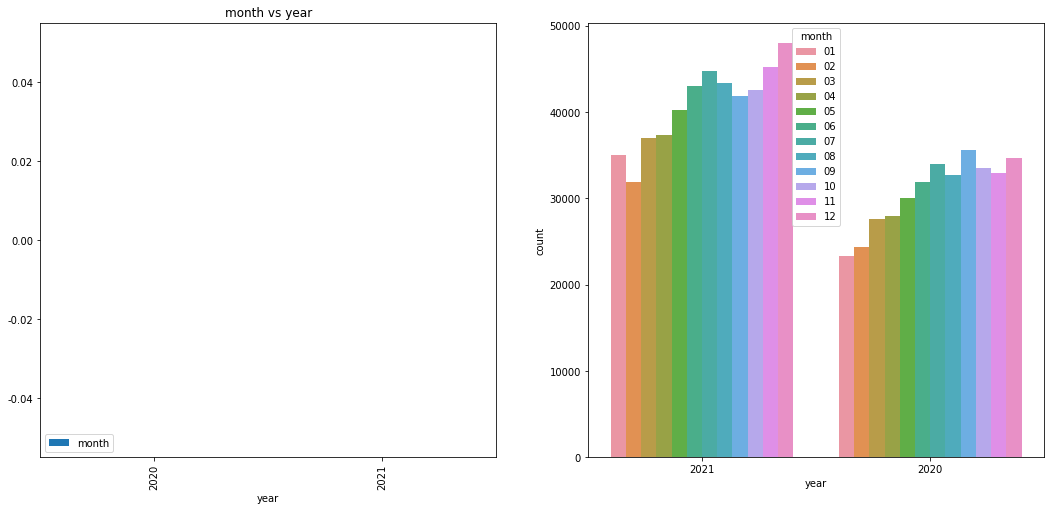

In [332]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df[['year','month']].groupby(['year']).mean().plot.bar(ax=ax[0])
ax[0].set_title('month vs year')
sns.countplot('year',hue='month',data=df,ax=ax[1],hue_order=mon)
plt.show()

#### It looks increasing the aggregation monthly.
#### Increasing as years go by increasingly.

In [333]:
df['q']=df['day'].dt.quarter
df.tail()

,day,customer,product,product_name,origin,quantity,price,aggregate,customer_code,week_of_day,holiday,year,month,quarter,q
858813,2020-08-31,xx토리앤쿡1호본점임시,1046611,*냉동마늘쫑 1kg(중국산 에스비트레이드),중국산,7.0,2700.0,18900.0,76,0,w,2020,08,2020Q3,3
858814,2020-08-31,xx토리앤쿡1호본점임시,1050146,*)냉동브로콜리 1kg(절단),스페인산,20.0,1840.0,36800.0,76,0,w,2020,08,2020Q3,3
858815,2020-08-31,xx토리앤쿡1호본점임시,1121018,(★직) 양파 망 15kg(생 230~280g/개),국내산,7.0,19700.0,137900.0,76,0,w,2020,08,2020Q3,3
858816,2020-08-31,xx토리앤쿡1호본점임시,1042775,*미숙포기김치 박스 10kg(고추분:중국산 김장독),배추(국내산)고추분(중국산),7.0,24360.0,170520.0,76,0,w,2020,08,2020Q3,3
858817,2020-08-31,xx토리앤쿡1호본점임시,1024098,*열무 박스 4kg(생 상),국내산,1.0,0.0,0.0,76,0,w,2020,08,2020Q3,3


#### Quarterly aggretation
#### Quarterly mean of total price bar chart

                 aggregate
year quarter              
2020 2020Q1   1.431521e+09
     2020Q2   1.591391e+09
     2020Q3   1.911380e+09
     2020Q4   1.981222e+09
2021 2021Q1   2.315255e+09
     2021Q2   2.393453e+09
     2021Q3   2.717568e+09
     2021Q4   2.947165e+09


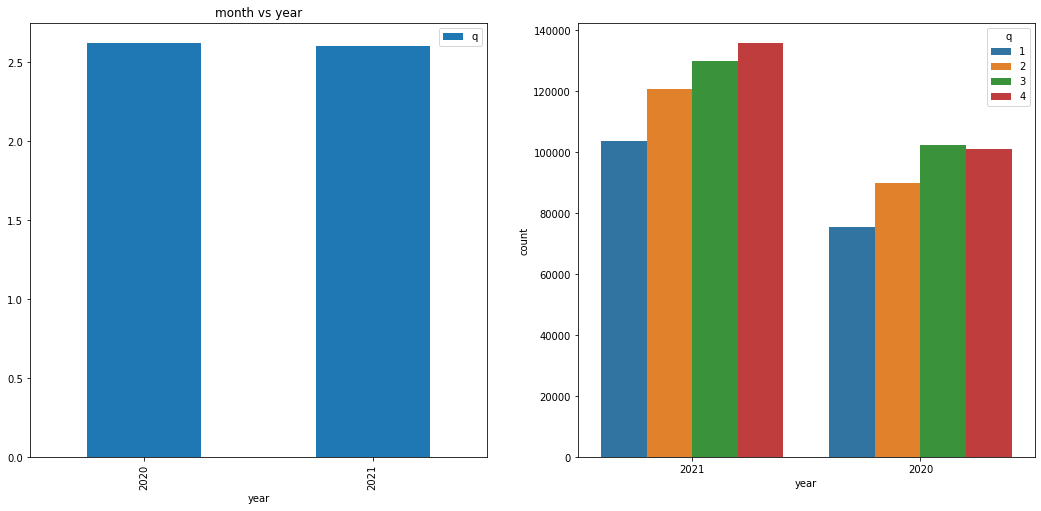

In [334]:
qu_group_day=df.groupby(['year', 'quarter']).agg({'aggregate':sum}) 
print(qu_group_day)

f,ax=plt.subplots(1,2,figsize=(18,8))
df[['year','q']].groupby(['year']).mean().plot.bar(ax=ax[0])
ax[0].set_title('month vs year')
sns.countplot('year',hue='q',data=df,ax=ax[1])
plt.show()

#### -It looks increasing the aggregation quarterly.
#### -Increasing as quarters go by increasingly.

#### Daily total price
#### Daily mean of total price bar chart

                     aggregate
year week_of_day              
2020 0            1.409445e+09
     1            1.162562e+09
     2            1.195503e+09
     3            1.174329e+09
     4            1.133857e+09
     5            8.305408e+08
     6            9.277845e+06
2021 0            2.014535e+09
     1            1.850944e+09
     2            1.744165e+09
     3            1.816499e+09
     4            1.973005e+09
     5            9.720443e+08
     6            2.249193e+06


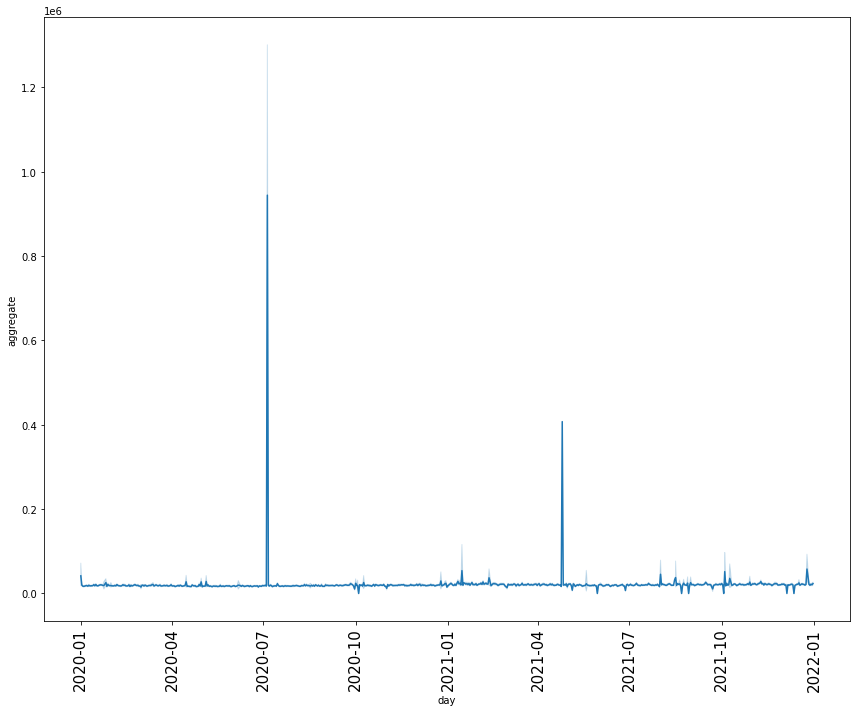

In [335]:
day_group_day=df.groupby(['year', 'week_of_day']).agg({'aggregate':sum}) 
print(day_group_day)

plt.figure(figsize=(12,10))
X=df['day']
Y=df['aggregate']
sns.lineplot(x=X, y=Y)
plt.tick_params(axis='x',labelsize=15,rotation=90)
plt.tight_layout()
plt.show()

#### Bind the products sorted by vendors

#### Total price different between holiday and non-holiday by monthly, quarterly, yearly

In [336]:
df.groupby(['holiday','month'])['aggregate'].sum()

holiday  month
h        01       1.848378e+07
         02       1.545182e+07
         03       2.169989e+06
         04       3.028730e+05
         05       4.144003e+07
         06       4.968510e+05
         08       2.363983e+07
         09       2.791028e+07
         10       4.352956e+07
         12       1.838182e+06
w        01       1.252423e+09
         02       1.158984e+09
         03       1.299263e+09
         04       1.277647e+09
         05       1.255194e+09
         06       1.409763e+09
         07       1.527743e+09
         08       1.497446e+09
         09       1.552209e+09
         10       1.514142e+09
         11       1.658498e+09
         12       1.710380e+09
Name: aggregate, dtype: float64

#### Overlook devided holiday and weekday by months

In [337]:
pd.crosstab(df.holiday, df.month, margins=True).style.background_gradient(cmap='summer_r') ##<--need to be invastigated

month,01,02,03,04,05,06,07,08,09,10,11,12,All
holiday,,,,,,,,,,,,,
h,949,810,153,11,2180,25,0,1230,1470,2116,0,40,8984
w,57443,55455,64390,65333,68097,74822,78757,74898,75957,73902,78171,82609,849834
All,58392,56265,64543,65344,70277,74847,78757,76128,77427,76018,78171,82649,858818


In [338]:
# df['product']=pd.to_numeric(df['product'])
# print(type(df['product'][0]))

#### The trasition of daily aggregation 

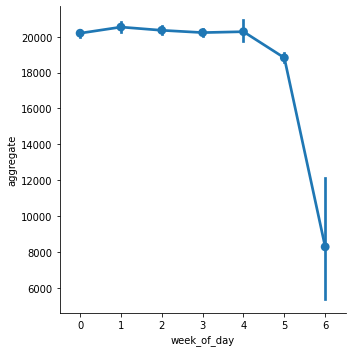

In [339]:
sns.factorplot('week_of_day','aggregate',data=df)
plt.show()

#### -The average of aggregation during weekdays is similar but it drastically decreased on weekends.

#### The trasition of monthly aggregation 

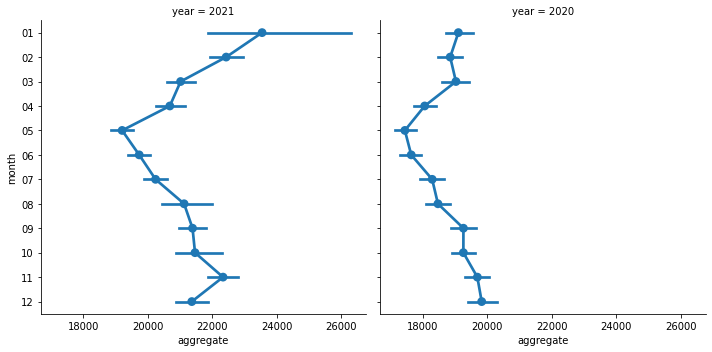

In [340]:
mon=df['month'].sort_values().unique()
sns.factorplot('aggregate','month',col='year',data=df, order=mon)
plt.show()

#### -It shows decreasing slowly from January to May which is the lowest purchase month and it recovering from May to December.
#### -It shows more purchased in 2021 than in 2020.

In [341]:
groupby_copy=groupby_vendor.copy()
groupby_copy['code_count']=groupby_copy['code'].value_counts() 
groupby_copy.head()

NameError: name 'groupby_vendor' is not defined

In [ ]:
code_counts=groupby_copy['code'].value_counts()
# print(code_counts)
# print(code_counts.index)
# print(code_counts[1])
for i in tqdm(code_counts.index):
    if groupby_copy.code.values==i:
        groupby_copy['code_count']=code_counts.values
groupby_copy.head()

In [ ]:
import numpy as np

n, c = np.unique(groupby_copy.code.values, return_counts=True)

dict_nc=dict(zip(n, c))


In [ ]:
value=groupby_copy.code.values
value

In [ ]:
code_index=code_counts.index
code_index

In [ ]:
code_value=code_counts.values
code_value

In [ ]:
from tqdm import tqdm

code_count = groupby_copy.code.unique()

for v in tqdm(code_count):
    temp_df = groupby_copy[groupby_copy.code == v]
    code_count = temp_df.value_counts()
    groupby_copy.loc[v, 'code_count'] = str(code_count)
    
groupby_copy.head()

In [ ]:
groupby_copy['code_count'].unique

#### Crosstab visualization that between vendors and period

군산정다운병원       21635
군산봉정요양병원**    20844
사랑요양병원**      20564
군산효자요양병원**    20282
주랑한방병원        19678
Name: customer, dtype: int64

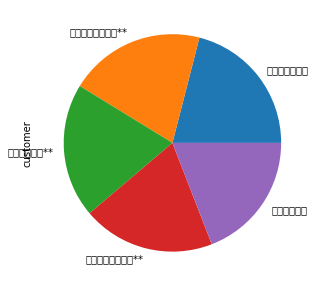

In [342]:
# df['customer'].nlargest()

df['customer'].value_counts()[:5].plot.pie(figsize=(5, 5))
df['customer'].value_counts()[:5]

In [343]:
pd.crosstab([df.quarter,df.year],[df.holiday, df.customer],margins=True).style.background_gradient(cmap='summer_r')

In [344]:
df[:10]

,day,customer,product,product_name,origin,quantity,price,aggregate,customer_code,week_of_day,holiday,year,month,quarter,q
0,2021-12-01,가은요양원,1028369,(직) 데친고사리 1kg(냉장},중국산,2.0,4030.0,8060.0,103,2,w,2021,12,2021Q4,4
1,2021-12-01,가은요양원,1105057,(직) 깐도라지채 1kg(냉장},중국산,2.0,7040.0,14080.0,103,2,w,2021,12,2021Q4,4
2,2021-12-01,가은요양원,1093670,콩나물 박스 4kg(상 곱슬이),"수입대두(중국,미국,캐나다)",1.0,5100.0,5100.0,103,2,w,2021,12,2021Q4,4
3,2021-12-01,가은요양원,1003475,*삼색수제비 1kg(동성 냉동),국내,2.0,2750.0,5500.0,103,2,w,2021,12,2021Q4,4
4,2021-12-01,가은요양원,1091376,*)자숙바지락살 350g(냉동),중국산,5.0,2420.0,12100.0,103,2,w,2021,12,2021Q4,4
5,2021-12-01,공동체협동조합,1142532,*)소앞다리 kg(소전각 2.5cm*2.5*2.5 깍둑 장조림용 냉동),호주,3.0,14950.0,44850.0,105,2,w,2021,12,2021Q4,4
6,2021-12-01,공동체협동조합,1019900,*하이라이스분말 1kg(오뚜기),국내제조(밀가루(밀:미국산/호주산)),1.0,6370.0,6370.0,105,2,w,2021,12,2021Q4,4
7,2021-12-01,공동체협동조합,1050052,*혼합버섯 kg(생 애느타리버섯 새송이버섯 표고버섯),국내산,1.0,7610.0,7610.0,105,2,w,2021,12,2021Q4,4
8,2021-12-01,공동체협동조합,1137396,지가이리멸치 500g(자멸치 지리멸치+가이리멸치 볶음용멸치 중),국내산,1.0,12010.0,12010.0,105,2,w,2021,12,2021Q4,4
9,2021-12-01,공동체협동조합,1104786,볶음아몬드 200g(웰넛 실온),미국,1.0,4430.0,4430.0,105,2,w,2021,12,2021Q4,4


In [345]:
g=df.groupby(['day','customer']).sum()
c=df.groupby(['day','customer']).count()
mean_price=g.iloc[:,3]/c.iloc[:,3]
print(mean_price)

day         customer    
2020-01-01  예수병원[본관]        227.0
            예수병원[재활]        229.0
2020-01-02  A-푸드마스터★          0.0
            xx토리앤쿡1호본점임시     76.0
            x고려병원            77.0
                            ...  
2021-12-31  해빛한방병원          317.0
            효_가족요양[본관]      321.0
            효_가족요양[직원]      322.0
            효사랑전주병원         324.0
            효사랑전주병원[농산]     326.0
Length: 46917, dtype: float64


In [346]:
print(c)

                         product  product_name  origin  quantity  price  \
day        customer                                                       
2020-01-01 예수병원[본관]           21            21      21        21     21   
           예수병원[재활]            8             8       8         8      8   
2020-01-02 A-푸드마스터★            1             1       1         1      1   
           xx토리앤쿡1호본점임시       32            32      32        32     32   
           x고려병원              25            25      25        25     25   
...                          ...           ...     ...       ...    ...   
2021-12-31 해빛한방병원             40            40      40        40     40   
           효_가족요양[본관]         44            44      44        44     44   
           효_가족요양[직원]          3             3       3         3      3   
           효사랑전주병원            52            52      52        52     52   
           효사랑전주병원[농산]        20            20      20        20     20   

                        

In [347]:
sales_dict = dict()
for c in df.customer.unique():
    temp = df[df['customer'] == c].groupby(['year', 'month']).count().day
    if temp.iloc[-4:].sum() > 10:
        sales_dict[c] = temp

In [348]:
len(sales_dict)

270

In [349]:
# print(df.shape)
df[df.customer.apply(lambda x: x in sales_dict.keys())]

,day,customer,product,product_name,origin,quantity,price,aggregate,customer_code,week_of_day,holiday,year,month,quarter,q
0,2021-12-01,가은요양원,1028369,(직) 데친고사리 1kg(냉장},중국산,2.0,4030.0,8060.0,103,2,w,2021,12,2021Q4,4
1,2021-12-01,가은요양원,1105057,(직) 깐도라지채 1kg(냉장},중국산,2.0,7040.0,14080.0,103,2,w,2021,12,2021Q4,4
2,2021-12-01,가은요양원,1093670,콩나물 박스 4kg(상 곱슬이),"수입대두(중국,미국,캐나다)",1.0,5100.0,5100.0,103,2,w,2021,12,2021Q4,4
3,2021-12-01,가은요양원,1003475,*삼색수제비 1kg(동성 냉동),국내,2.0,2750.0,5500.0,103,2,w,2021,12,2021Q4,4
4,2021-12-01,가은요양원,1091376,*)자숙바지락살 350g(냉동),중국산,5.0,2420.0,12100.0,103,2,w,2021,12,2021Q4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858813,2020-08-31,xx토리앤쿡1호본점임시,1046611,*냉동마늘쫑 1kg(중국산 에스비트레이드),중국산,7.0,2700.0,18900.0,76,0,w,2020,08,2020Q3,3
858814,2020-08-31,xx토리앤쿡1호본점임시,1050146,*)냉동브로콜리 1kg(절단),스페인산,20.0,1840.0,36800.0,76,0,w,2020,08,2020Q3,3
858815,2020-08-31,xx토리앤쿡1호본점임시,1121018,(★직) 양파 망 15kg(생 230~280g/개),국내산,7.0,19700.0,137900.0,76,0,w,2020,08,2020Q3,3
858816,2020-08-31,xx토리앤쿡1호본점임시,1042775,*미숙포기김치 박스 10kg(고추분:중국산 김장독),배추(국내산)고추분(중국산),7.0,24360.0,170520.0,76,0,w,2020,08,2020Q3,3


In [350]:
df_cp=df.copy()

from tqdm import tqdm

vendors = df.customer.unique()

for v in tqdm(vendors):
    temp_df = df_cp[df_cp.customer == v]
    code_list = temp_df.code.to_list()
    groupby_vendor.loc[v, 'codes'] = str(code_list)
    
groupby_vendor.head()
#print(type(code_list))

  0%|          | 0/328 [00:00<?, ?it/s]


AttributeError: 'DataFrame' object has no attribute 'code'

In [ ]:
df.groupby(['month','customer']).nunique()

In [351]:
df_cp=df.copy()
groups=df_cp.groupby('customer')
groups.size()
# df_cp=df_cp.groupby('customer')[['day','product']]
# print(df_cp.head())
# df_cp=df_cp.set_index(keys=['customer'])
# df_cp.head()

customer
A-푸드마스터★         1844
A-푸드마스터★[농산]       85
ABC[배송팀]          344
ABC[본사사무실]        467
ABC[샘플 김장독]        17
                ...  
효_가족요양[행사]        250
효사랑전주병원         12853
효사랑전주병원[기타]       244
효사랑전주병원[농산]      6526
효사랑전주병원[직원]       187
Length: 328, dtype: int64

In [352]:
df_cp=df_cp.groupby('customer')[['day','product']].apply(lambda x:x.set_index('day').to_dict()).to_dict()
# print(df_cp)

In [353]:
{n:grp.loc[n].to_dict('index') for n,grp in df_cp.set_index(['customer','day']).groupby(level='customer')}

AttributeError: 'dict' object has no attribute 'set_index'

In [ ]:
# df_cp.to_dict()

In [354]:
# Apply apriori to all raw data

df_cp=df.copy()
customers = df.customer.unique()

for v in tqdm(customers):
    temp_df = df[df.customer == v]
    product_list = temp_df['product'].to_list()
    df_cp.loc[temp_df.index, 'products'] = str(product_list)

    
df_cp.head()
#print(type(code_list))

100%|██████████| 328/328 [00:17<00:00, 18.69it/s]


,day,customer,product,product_name,origin,quantity,price,aggregate,customer_code,week_of_day,holiday,year,month,quarter,q,products
0,2021-12-01,가은요양원,1028369,(직) 데친고사리 1kg(냉장},중국산,2.0,4030.0,8060.0,103,2,w,2021,12,2021Q4,4,"['1028369', '1105057', '1093670', '1003475', '..."
1,2021-12-01,가은요양원,1105057,(직) 깐도라지채 1kg(냉장},중국산,2.0,7040.0,14080.0,103,2,w,2021,12,2021Q4,4,"['1028369', '1105057', '1093670', '1003475', '..."
2,2021-12-01,가은요양원,1093670,콩나물 박스 4kg(상 곱슬이),"수입대두(중국,미국,캐나다)",1.0,5100.0,5100.0,103,2,w,2021,12,2021Q4,4,"['1028369', '1105057', '1093670', '1003475', '..."
3,2021-12-01,가은요양원,1003475,*삼색수제비 1kg(동성 냉동),국내,2.0,2750.0,5500.0,103,2,w,2021,12,2021Q4,4,"['1028369', '1105057', '1093670', '1003475', '..."
4,2021-12-01,가은요양원,1091376,*)자숙바지락살 350g(냉동),중국산,5.0,2420.0,12100.0,103,2,w,2021,12,2021Q4,4,"['1028369', '1105057', '1093670', '1003475', '..."


In [355]:
df_cp=df_cp[['customer_code','products']]
df_cp.head()

,customer_code,products
0,103,"['1028369', '1105057', '1093670', '1003475', '..."
1,103,"['1028369', '1105057', '1093670', '1003475', '..."
2,103,"['1028369', '1105057', '1093670', '1003475', '..."
3,103,"['1028369', '1105057', '1093670', '1003475', '..."
4,103,"['1028369', '1105057', '1093670', '1003475', '..."


In [356]:
df_unique=df_cp.copy()
df_unique=df_cp.drop_duplicates(subset=['customer_code'])
print(df_unique.isna().sum())
print(df_unique.shape)
df_unique.head()

customer_code    0
products         0
dtype: int64
(328, 2)


,customer_code,products
0,103,"['1028369', '1105057', '1093670', '1003475', '..."
5,105,"['1142532', '1019900', '1050052', '1137396', '..."
15,107,"['1137600', '1087869', '1108721', '1021969', '..."
55,114,"['1020401', '1096452', '1094493', '1039101', '..."
65,115,"['1083710', '1023047', '1028318', '1036760', '..."


In [357]:
df_unique['products'].str.len().max()

237985

In [358]:
df_sort=df_unique['customer_code'].astype(str).str.replace('.','')
df_unique['df_sort']=df_sort
df_ordered=df_unique.sort_values(by='products',key=lambda x:x.str.len(),ascending=False).drop(columns=['customer_code'])[:50]

In [ ]:
transcactions=df_unique['products'].apply(lambda x:sorted(x.split(',')))
print(transcactions)

In [ ]:
encoder=TransactionEncoder().fit(transcactions)
onehot=encoder.transform(transcactions)
onehot=pd.DataFrame(onehot, columns=encoder.columns_)

frequent_itemsets = apriori(onehot, min_support = 0.05, max_len = 3, use_colnames=True)
# print(frequent_itemsets)
rules = association_rules(frequent_itemsets, metric="lift")

In [ ]:
rules['lhs items'] = rules['antecedents'].apply(lambda x:len(x) )
rules[rules['lhs items']>1].sort_values('lift', ascending=False).head()

In [ ]:
rules['antecedents_'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))
rules['consequents_'] = rules['consequents'].apply(lambda a: ','.join(list(a)))
# pivot = rules[rules['lhs items']>1].pivot(index = 'antecedents_', columns = 'consequents_', values= 'lift')
# sns.heatmap(pivot, annot = True)
# plt.yticks(rotation=0)
# plt.xticks(rotation=90)
# plt.show()

In [ ]:
pivot = rules[rules['lhs items']>1].pivot(index = 'antecedents_', columns = 'consequents_', values= 'lift')

In [ ]:
sns.heatmap(pivot, annot = True)

In [ ]:
import itertools

In [ ]:
onehot_=df_unique.pivot_table(index='customer_code',columns='products', aggfunc=len, fill_value=0)
onehot_ = onehot_>0
onehot_

In [ ]:
print([g for n, g in df.groupby(pd.Grouper(key='day',freq='W'))][0])

In [ ]:
year=df['year'].sort_values().unique()
qua=df['quarter'].sort_values().unique()
f,ax=plt.subplots(2,figsize=(10,8))
sns.barplot('aggregate','year',data=df,ax=ax[0],hue_order=year)
sns.factorplot('aggregate','quarter',data=df,ax=ax[1],order=qua)

In [ ]:
##### The barplot and factorplot shows that the difference lump sum between each year and each quarters. The barplot roughly increases in 2021Q4.

In [ ]:
#### Bar plot shows that lump sum by month

In [ ]:
f,ax=plt.subplots(2,figsize=(10,10))
df[['month','aggregate']].groupby(['month']).mean().plot.bar(ax=ax[0])

In [ ]:
#### Bar plot shows that mean of lump sum by quarter

In [ ]:
df.groupby(['holiday','quarter'])['aggregate'].sum()

In [ ]:
f,ax=plt.subplots(2,figsize=(10,10))
df[['quarter','aggregate']].groupby(['quarter']).mean().plot.bar(ax=ax[0])

##### -Bar chart shows increase the lump sum slowly as time goes by

#### Bar plot shows that mean of lump sum by days

In [ ]:
f,ax=plt.subplots(2,figsize=(8,8))
df[['week_of_day','aggregate']].groupby(['week_of_day']).mean().plot.bar(ax=ax[0])

##### Barchart shows the lump sum evenly on weekdays but Sunday. The amount of purchase is similar from Monday to Saturday but Sunday.

#### Bar plot shows that mean of lump sum yearly by holidays 

In [ ]:
f,ax=plt.subplots(2,figsize=(5,5))
df[['holiday','year']].groupby(['holiday']).mean().plot.bar(ax=ax[0])
sns.countplot('holiday',hue='year',data=df,ax=ax[1])
plt.show()

##### The barplot shows that the amount of purchase on weekday is clearly bigger than holiday. And the amount in 2021 is bigger than 2020.

In [ ]:
year_price=df['aggregate'].groupby(df['year'])
year_price_sum=year_price.sum()
print(year_price_sum)
 
# Graph of yearly price
year_price_sum.plot(kind='bar',stacked=True, figsize=[5,5],fontsize=14, colormap='Accent')
plt.xlabel('year',fontsize=16)
plt.ylabel('aggregate',fontsize=16)

In [ ]:
month_price=df['aggregate'].groupby(df['month'])
month_price_sum=month_price.sum()
print(month_price_sum)
 
# Graph of monthly price
month_price_sum.plot(kind='bar',stacked=True, figsize=[5,5],fontsize=14, colormap='Accent')
plt.xlabel('month',fontsize=16)
plt.ylabel('price',fontsize=16)

In [ ]:
quarter_price=df['price'].groupby(df['quarter'])
quarter_price_sum=quarter_price.sum()
print(quarter_price_sum)
 
# Graph of quarterly price
quarter_price_sum.plot(kind='bar',stacked=True, figsize=[5,5],fontsize=14, colormap='Accent')
plt.xlabel('quarter',fontsize=16)
plt.ylabel('price',fontsize=16)

In [ ]:
# Minimum price grouped by holiday
holiday_min_price=df.groupby('holiday')['price'].min()
holiday_min_price=pd.DataFrame(holiday_min_price).rename(columns={'price':'min'})
holiday_min_price

In [ ]:
# Maximum price grouped by holiday
holiday_max_price=df.groupby('holiday')['price'].max()
holiday_max_price=pd.DataFrame(holiday_max_price).rename(columns={'price':'max'})
holiday_max_price

In [ ]:
# Mean price grouped by holiday
holiday_mean_price=df.groupby('holiday')['price'].mean()
holiday_mean_price=pd.DataFrame(holiday_mean_price).rename(columns={'price':'mean'})
holiday_mean_price

In [ ]:
holiday_mean_price.plot(kind='bar', stacked=False, figsize=[5,5],fontsize=14, colormap='Accent')


In [ ]:
# Median price grouped by holiday
holiday_median_price=df.groupby('holiday')['price'].median()
holiday_median_price=pd.DataFrame(holiday_median_price).rename(columns={'price':'median'})
holiday_median_price

In [ ]:
a = np.arange(16).reshape(4, 4)
print(a)

a[:, 1]

In [ ]:
a[:,1:]

In [ ]:
holiday_concat=pd.concat([holiday_min_price,holiday_max_price, holiday_mean_price, holiday_median_price], axis=1) 
holiday_concat

In [ ]:
holiday_concat.plot(kind='bar',stacked=True, figsize=[5,5],fontsize=14, colormap='Accent')
plt.xlabel('holiday',fontsize=16)
plt.ylabel('price',fontsize=16)

In [ ]:
# unstack=holiday_concat.unstack() 
fig, ax=plt.subplots(ncols=4, sharey=True, figsize=[5,5])
# ax[0].barh(holiday_concat.index.tolist(), holiday_concat['min'], align='center', color='b', height=0.75)
# ax[1].barh(holiday_concat.index.tolist(), holiday_concat['max'], align='center', color='b', height=0.75)
# ax[2].barh(holiday_concat.index.tolist(), holiday_concat['mean'], align='center', color='b', height=0.75)
# ax[3].barh(holiday_concat.index.tolist(), holiday_concat['median'], align='center', color='b', height=0.75)

ax[0].barh(holiday_concat, holiday_concat['min'], align='center', color='b', height=0.75)
ax[1].barh(holiday_concat, holiday_concat['max'], align='center', color='b', height=0.75)
ax[2].barh(holiday_concat, holiday_concat['mean'], align='center', color='b', height=0.75)
ax[3].barh(holiday_concat, holiday_concat['median'], align='center', color='b', height=0.75)
plt.show()

# unstack.plot(kind='bar', stacked=False, figsize=[5,5],fontsize=14, colormap='Accent')
# plt.xlabel('holiday',fontsize=16)
# plt.ylabel('price',fontsize=16)

In [ ]:
print(df.groupby(['month']))

In [ ]:
sns.kdeplot(df['month'])
plt.show()

In [ ]:
pig,ax=plt.subplots(ncols=2, sharey=True,figsize=[5,5])
ax[0].barh(holiday_concat.index.tolist(), holiday_concat['holiday']['h'].tolist(), align='center',color='b',height=0.75)
ax[0].set_xlim(20,35) 
ax[1].barh(holiday_concat.index.tolist(), holiday_concat['holiday']['w'].tolist(), align='center',color='b',height=0.75)
ax[1].set_xlim(20,35) 
plt.show()

In [ ]:
print(df.groupby(['vendor','holiday']))


In [ ]:
holiday_max_price

In [ ]:
df.groupby(df['code']).mean()

In [ ]:
groupby_customer = df.groupby('customer').max()
groupby_customer['product'] = None

In [ ]:
from tqdm import tqdm

vendors = df.customer.unique()

for v in tqdm(vendors):
    temp_df = df[df.customer == v]
    code_list = temp_df.code.to_list()
    groupby_vendor.loc[v, 'codes'] = str(code_list)
    
groupby_vendor.head()
#print(type(code_list))